# 2Day subsampling on the GlobColour Dataset
* preprocessing task 1: add time variable to the raw dataset
* preprocessing task N: this need to be done for *all* variables in the new merged dataset 

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from dask.diagnostics import ProgressBar
import seaborn as sns
from matplotlib.colors import LogNorm

In [3]:
# resampling frequency in number of days
freq=2

## Load data from disk

We already downloaded the subsetted and merged GlobColour dataset for the Arabian Sea.

Here We read all the netcdf files into one xarray Dataset using the open_dataset function. The daily data need to add time to the dataset

In [3]:
#ds_daily = xr.open_mfdataset('./data_globcolour/665648402.data/chl1/L3m_200204*_*AVW*_CHL1_DAY_00.nc')


ds_daily = xr.open_mfdataset('./data_globcolour/665648402.data/chl1/chl1_GSM_not_used/L3m_2017*__665648402_4_GSM-MODVIR_CHL1_DAY_00.nc', concat_dim=np.arange(192))


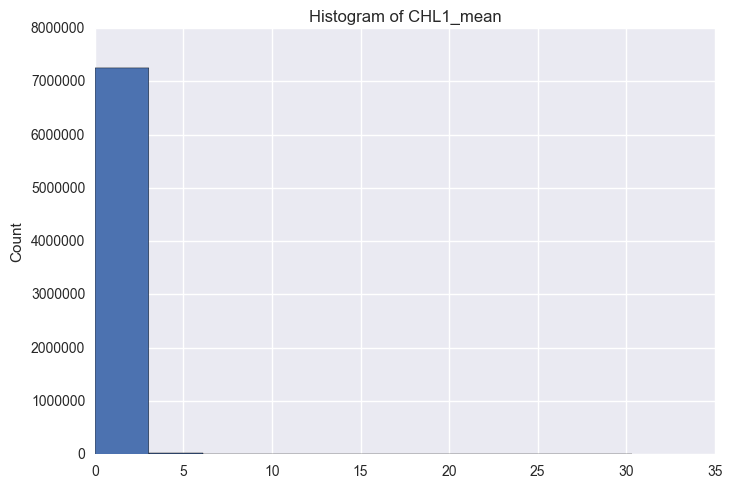

In [5]:
ds_daily.CHL1_mean.plot()
ds_daily.close()

In [6]:
# experiment: add time to the dataset and merge them
# step1: add time
# step2: merge
ds_daily1 = xr.open_mfdataset('./data_globcolour/665648402.data/chl1/chl1_AVW/L3m_20091129__665648402_4_AVW-MERMODSWF_CHL1_DAY_00.nc')
ds_daily2 = xr.open_mfdataset('./data_globcolour/665648402.data/chl1/chl1_AVW/L3m_20170711__665648402_4_AVW-MODVIR_CHL1_DAY_00.nc')

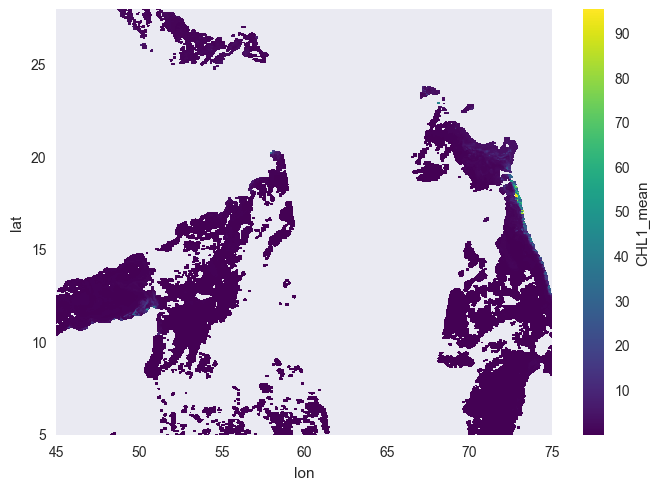

In [7]:
ds_daily1.CHL1_mean.plot()

In [8]:
ds_daily1.keys

<bound method Mapping.keys of <xarray.Dataset>
Dimensions:     (lat: 553, lon: 721)
Coordinates:
  * lat         (lat) float32 28.0208 27.9792 27.9375 27.8958 27.8542 ...
  * lon         (lon) float32 44.9792 45.0208 45.0625 45.1042 45.1458 ...
Data variables:
    CHL1_mean   (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan ...
    CHL1_flags  (lat, lon) float64 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 ...
    CHL1_error  (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions:                CF-1.4
    title:                      GlobColour daily merged MERIS/MODIS/SeaWiFS p...
    product_name:               L3m_20091129__665648402_4_AVW-MERMODSWF_CHL1_...
    product_type:               day
    product_version:            2016.1
    product_level:              3
    parameter_code:             CHL1
    parameter:                  Chlorophyll concentration
    parameter_algo_list:        OC4Me,,
    publication:                O'Reilly, J.E

In [9]:
# http://xarray.pydata.org/en/stable/data-structures.html
# modify the data structure to add a time as coordinates
ds_daily1_new = ds_daily1.assign_coords(time=pd.to_datetime('20091129'))
ds_daily1_new

<xarray.Dataset>
Dimensions:     (lat: 553, lon: 721)
Coordinates:
  * lat         (lat) float32 28.0208 27.9792 27.9375 27.8958 27.8542 ...
  * lon         (lon) float32 44.9792 45.0208 45.0625 45.1042 45.1458 ...
    time        datetime64[ns] 2009-11-29
Data variables:
    CHL1_mean   (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan ...
    CHL1_flags  (lat, lon) float64 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 ...
    CHL1_error  (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions:                CF-1.4
    title:                      GlobColour daily merged MERIS/MODIS/SeaWiFS p...
    product_name:               L3m_20091129__665648402_4_AVW-MERMODSWF_CHL1_...
    product_type:               day
    product_version:            2016.1
    product_level:              3
    parameter_code:             CHL1
    parameter:                  Chlorophyll concentration
    parameter_algo_list:        OC4Me,,
    publication:                O

In [10]:
ds_daily1_new.dims

Frozen(SortedKeysDict({'lon': 721, 'lat': 553}))

In [11]:
ds_daily2

<xarray.Dataset>
Dimensions:     (lat: 553, lon: 721)
Coordinates:
  * lat         (lat) float32 28.0208 27.9792 27.9375 27.8958 27.8542 ...
  * lon         (lon) float32 44.9792 45.0208 45.0625 45.1042 45.1458 ...
Data variables:
    CHL1_mean   (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan ...
    CHL1_flags  (lat, lon) float64 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 ...
    CHL1_error  (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions:                CF-1.4
    title:                      GlobColour daily merged MODIS/VIIRSN product
    product_name:               L3m_20170711__665648402_4_AVW-MODVIR_CHL1_DAY...
    product_type:               day
    product_version:            2016.1
    product_level:              3
    parameter_code:             CHL1
    parameter:                  Chlorophyll concentration
    parameter_algo_list:        ,
    publication:                O'Reilly, J.E., and 24 Coauthors, 2000: SeaWi...
    

In [12]:
ds_daily2_new = ds_daily2.assign_coords(time=pd.to_datetime('20170711'))
ds_daily2_new
ds_daily2_new.expand_dims('time')

<xarray.Dataset>
Dimensions:     (lat: 553, lon: 721, time: 1)
Coordinates:
  * lat         (lat) float32 28.0208 27.9792 27.9375 27.8958 27.8542 ...
  * lon         (lon) float32 44.9792 45.0208 45.0625 45.1042 45.1458 ...
  * time        (time) datetime64[ns] 2017-07-11
Data variables:
    CHL1_mean   (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    CHL1_flags  (time, lat, lon) float64 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 ...
    CHL1_error  (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions:                CF-1.4
    title:                      GlobColour daily merged MODIS/VIIRSN product
    product_name:               L3m_20170711__665648402_4_AVW-MODVIR_CHL1_DAY...
    product_type:               day
    product_version:            2016.1
    product_level:              3
    parameter_code:             CHL1
    parameter:                  Chlorophyll concentration
    parameter_algo_list:        ,
    publication:     

In [13]:
ds_daily1_new.assign_coords(time=pd.to_datetime('20091129'))
ds_daily1_new
ds_daily1_new.expand_dims('time')

<xarray.Dataset>
Dimensions:     (lat: 553, lon: 721, time: 1)
Coordinates:
  * lat         (lat) float32 28.0208 27.9792 27.9375 27.8958 27.8542 ...
  * lon         (lon) float32 44.9792 45.0208 45.0625 45.1042 45.1458 ...
  * time        (time) datetime64[ns] 2009-11-29
Data variables:
    CHL1_mean   (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    CHL1_flags  (time, lat, lon) float64 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 ...
    CHL1_error  (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions:                CF-1.4
    title:                      GlobColour daily merged MERIS/MODIS/SeaWiFS p...
    product_name:               L3m_20091129__665648402_4_AVW-MERMODSWF_CHL1_...
    product_type:               day
    product_version:            2016.1
    product_level:              3
    parameter_code:             CHL1
    parameter:                  Chlorophyll concentration
    parameter_algo_list:        OC4Me,,
    publica

<xarray.DataArray 'CHL1_mean' (time: 2, lat: 553, lon: 721)>
dask.array<concatenate, shape=(2, 553, 721), dtype=float64, chunksize=(1, 553, 721)>
Coordinates:
  * lat      (lat) float32 28.0208 27.9792 27.9375 27.8958 27.8542 27.8125 ...
  * lon      (lon) float32 44.9792 45.0208 45.0625 45.1042 45.1458 45.1875 ...
  * time     (time) datetime64[ns] 2009-11-29 2017-07-11
Attributes:
    standard_name:            mass_concentration_of_chlorophyll_a_in_sea_water
    long_name:                Chlorophyll concentration - Mean of the binned ...
    units:                    mg/m3
    pct_characterised_error:  43.31

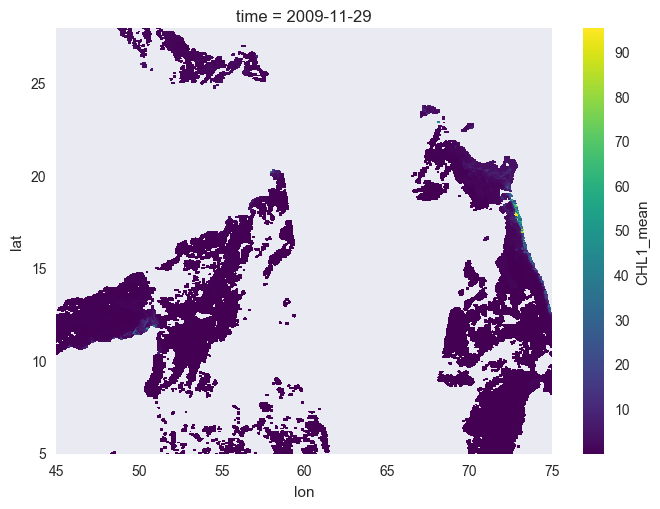

In [14]:
## no need to expand dim!!!
## can just combined and get dataarray on one variable fromt he dataset !!
ds_daily12 = xr.concat([ds_daily1_new.CHL1_mean, ds_daily2_new.CHL1_mean], 'time')
#ds_daily12.CHL1_mean.sel(time = '2009-11-29').plot()
#aa = ds_daily12.to_dataset()
ds_daily12.sel(time = '2009-11-29').plot()
ds_daily12

In [ ]:
var = 'CHL1'
date_start = '20020428'
date_end = '20170711'
# reg-ex
# bottleneck on concatenation?
years = range(2002,2018)

In [72]:
prefix = 'L3m'
year = 2002
varname = 'CHL1'
freq = 'DAY'

import re

part1 = '%s_%g' % (prefix, year)
print(part1)
part2 = '%s_%s' %(varname, freq)
print(part2)

import os
files = os.listdir('.')
for name in files:
    print(name)
    


#re.match()
#fname = re.match(r"%s_%s .*%g_%s\.nc$" % (prefix, year, varname, freq))
#%fname = '%s_%s*%g_%s.nc' % (prefix, year, varname, freq)

L3m_2002
CHL1_DAY
.DS_Store
.gitignore
.idea
.ipynb_checkpoints
2delete.ipynb
__pycache__
buoydata.py
buyodata
count_data.ipynb
data
data_collector_modisa_chla9km
data_collector_modisa_IopAdg443Giop_9km
data_collector_modisa_KD490_9km
data_collector_modisa_NSST11mu_9km
data_collector_modisa_PAR_9km
data_collector_modisa_RssAot869_9km
data_collector_seawifs_2delete
data_coverage_2D_interp_LDS_chlor.ipynb
data_coverage_2D_interp_LDS_chlorgithub.ipynb
data_coverage_8D_interp_LDS_chlor.ipynb
data_coverage_8D_interp_LDS_chlorgithub.ipynb
data_coverage_GlobColour_preprocess.ipynb
data_coverage_multidimensionalInterpolation
data_coverage_xarray_interpolation
data_globcolour
data_helpers_modisa_NSST11mu_9km.py
datetime_strftime.ipynb
df_chl_dist_out_2D_modisa.csv
df_LDS_2d.csv
dist2land_data
dist_to_coast.ipynb
download_arabian_sea.ipynb
experiment1_difflogC_regdist
gdp_float
readme
README.md
report_archive_20161205
roc_to_rocLogE_New.ipynb
test_downloader_modisa_NSST11mu_9km.py
test_OC_CCI.ip

In [29]:
range?

In [ ]:
in_dir
out_dir
var
subvar
varname


In [112]:
# drop variables
dset = xr.open_dataset('./data_globcolour/665648402.data/chl1/chl1_AVW/L3m_20091129__665648402_4_AVW-MERMODSWF_CHL1_DAY_00.nc', drop_variables = ['CHL1_flags','CHL1_error'])
dset

<xarray.Dataset>
Dimensions:    (lat: 553, lon: 721)
Coordinates:
  * lat        (lat) float32 28.0208 27.9792 27.9375 27.8958 27.8542 27.8125 ...
  * lon        (lon) float32 44.9792 45.0208 45.0625 45.1042 45.1458 45.1875 ...
Data variables:
    CHL1_mean  (lat, lon) float64 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions:                CF-1.4
    title:                      GlobColour daily merged MERIS/MODIS/SeaWiFS p...
    product_name:               L3m_20091129__665648402_4_AVW-MERMODSWF_CHL1_...
    product_type:               day
    product_version:            2016.1
    product_level:              3
    parameter_code:             CHL1
    parameter:                  Chlorophyll concentration
    parameter_algo_list:        OC4Me,,
    publication:                O'Reilly, J.E., and 24 Coauthors, 2000: SeaWi...
    site_name:                  665648402
    sensor_name:                WEIGHTED_AVERAGING
    sensor:                     Merged data - w

In [4]:
# Experiment 1
# preprocess all the file of one variable in batch one by one
import os
from tqdm import tqdm

dirnameprefix = '/Users/vyan2000/work_linux/2Archive/myproject/20161024xray_oceancolor/ocean_color-master/data_globcolour/665648402.data/'
dirname = dirnameprefix + 'test/'

files = os.listdir(dirname)

datasets = []
for name in tqdm(files):
    # load each
    nametime = name[4:12]  # extract time, add specific'time' coordinate, concatenate 
    #print(nametime)
    path = dirname + name
    dset = xr.open_dataset(path, drop_variables = ['CHL1_flags','CHL1_error'])
    dset_new = dset.assign_coords(time=pd.to_datetime(nametime))
    #print(dset_new)
    datasets.append(dset_new) 

dataset_chl = xr.concat(datasets, dim = 'time')

outdir = dirnameprefix + 'timeConcatenatedNC/'
dataset_chl.to_netcdf(outdir+'test_chl1.nc', mode='w')
dataset_chl.close()

# experiment 1: ** test **
dset = xr.open_dataset(outdir + 'test_chl1.nc')
print(dset)
#dset.close()
    

100%|██████████| 2/2 [00:00<00:00, 96.77it/s]

<xarray.Dataset>
Dimensions:    (lat: 553, lon: 721, time: 2)
Coordinates:
  * lat        (lat) float32 28.0208 27.9792 27.9375 27.8958 27.8542 27.8125 ...
  * lon        (lon) float32 44.9792 45.0208 45.0625 45.1042 45.1458 45.1875 ...
  * time       (time) datetime64[ns] 2002-04-28 2002-04-29
Data variables:
    CHL1_mean  (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions:                CF-1.4
    title:                      GlobColour daily merged MERIS/SeaWiFS product
    product_name:               L3m_20020428__665648402_4_AVW-MERSWF_CHL1_DAY...
    product_type:               day
    product_version:            2016.1
    product_level:              3
    parameter_code:             CHL1
    parameter:                  Chlorophyll concentration
    parameter_algo_list:        ,
    publication:                O'Reilly, J.E., and 24 Coauthors, 2000: SeaWi...
    site_name:                  665648402
    sensor_name:                WEIGH

In [24]:
# Experiment 2
# preprocess all the file of one variable in batch one by one
import os
from tqdm import tqdm

dirnameprefix = '/Users/vyan2000/work_linux/2Archive/myproject/20161024xray_oceancolor/ocean_color-master/data_globcolour/665648402.data/'
dirname = dirnameprefix + 'test2/'

files = os.listdir(dirname)

datasets = []
for name in tqdm(files):
    # load each
    nametime = name[4:12]  # extract time, add specific'time' coordinate, concatenate 
    #print(nametime)
    path = dirname + name
    dset = xr.open_dataset(path)
    #dset = xr.open_dataset(path, drop_variables = ['CHL1_flags','CHL1_error'])
    dset_new = dset.assign_coords(time=pd.to_datetime(nametime))
    #print(dset_new)
    datasets.append(dset_new) 

dataset_xxx = xr.concat(datasets, dim = 'time')
dataset_xxx

100%|██████████| 1/1 [00:00<00:00, 67.57it/s]


<xarray.Dataset>
Dimensions:     (lat: 553, lon: 721, time: 1)
Coordinates:
  * lat         (lat) float32 28.0208 27.9792 27.9375 27.8958 27.8542 ...
  * lon         (lon) float32 44.9792 45.0208 45.0625 45.1042 45.1458 ...
  * time        (time) datetime64[ns] 2002-04-28
Data variables:
    T865_mean   (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
    T865_flags  (time, lat, lon) float64 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 9.0 ...
    T865_error  (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions:                CF-1.4
    title:                      GlobColour daily merged MERIS/SeaWiFS product
    product_name:               L3m_20020428__665648402_4_AVW-MERSWF_T865_DAY...
    product_type:               day
    product_version:            2016.1
    product_level:              3
    parameter_code:             T865
    parameter:                  Aerosol optical thickness over water
    parameter_algo_list:        ,
    publi

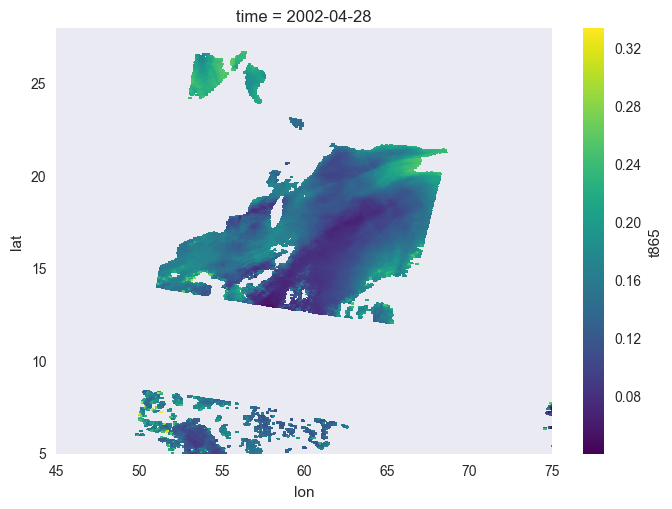

In [25]:
#dataset_xxx.sel('KD490-LEE_flags')
aa = dataset_xxx.rename({'T865_mean':'t865'})
aa.t865.plot()

In [9]:
#ulimit -n 10000
!ulimit -a   # maximum allowed open files

core file size          (blocks, -c) 0
data seg size           (kbytes, -d) unlimited
file size               (blocks, -f) unlimited
max locked memory       (kbytes, -l) unlimited
max memory size         (kbytes, -m) unlimited
open files                      (-n) 252
pipe size            (512 bytes, -p) 1
stack size              (kbytes, -s) 8192
cpu time               (seconds, -t) unlimited
max user processes              (-u) 709
virtual memory          (kbytes, -v) unlimited


In [4]:
# Experiment 3
# process all the file of CHL1 using Experiment 1 
# process all the file of one variable in batch one by one
import os
from tqdm import tqdm

varname = 'chl1'
dirnameprefix = '/Users/vyan2000/work_linux/2Archive/myproject/20161024xray_oceancolor/ocean_color-master/data_globcolour/665648402.data/'
dirname = dirnameprefix + varname + '/chl1_AVW/'
files = os.listdir(dirname)

datasets = []
for name in tqdm(files):
    # load each
    nametime = name[4:12]  # extract time, add specific'time' coordinate, concatenate 
    #print(nametime)
    path = dirname + name
    dset = xr.open_dataset(path, drop_variables = ['CHL1_flags','CHL1_error'])
    dset_new = dset.assign_coords(time=pd.to_datetime(nametime))
    datasets.append(dset_new) 

dataset_chl = xr.concat(datasets, dim = 'time')
print(dataset_chl)
#outdir = dirnameprefix + 'timeConcatenatedNC/'
#dataset_chl.to_netcdf(outdir+'chl1_GlobCol_timeConcatenated.nc', mode='w')
#dataset_chl.close()


    

  0%|          | 7/5538 [00:00<01:28, 62.60it/s]

20020428
20020429
20020430
20020501
20020502
20020503
20020504
20020505
20020506
20020507
20020508
20020509
20020510
20020511
20020512
20020513

  0%|          | 23/5538 [00:00<01:30, 61.14it/s]


20020514
20020515
20020516
20020517
20020518
20020519
20020520
20020521
20020522
20020523
20020524
20020525
20020526
20020527
20020528

  1%|          | 42/5538 [00:00<01:16, 71.79it/s]


20020529
20020530
20020531
20020601
20020602
20020603
20020604
20020605
20020606
20020607
20020608
20020609
20020610
20020611
20020612
20020613
20020614
20020615
20020616

  1%|          | 62/5538 [00:00<01:08, 79.38it/s]


20020617
20020618
20020619
20020620
20020621
20020622
20020623
20020624
20020625
20020626
20020627
20020628
20020629
20020630
20020701
20020702
20020703
20020704
20020705


  1%|▏         | 83/5538 [00:01<01:03, 86.23it/s]

20020706
20020707
20020708
20020709
20020710
20020711
20020712
20020713
20020714
20020715
20020716
20020717
20020718
20020719
20020720
20020721
20020722
20020723
20020724


  2%|▏         | 101/5538 [00:01<01:05, 82.44it/s]

20020725
20020726
20020727
20020728
20020729
20020730
20020731
20020801
20020802
20020803
20020804
20020805
20020806
20020807
20020808
20020809
20020810

  2%|▏         | 110/5538 [00:01<01:08, 79.82it/s]


20020811
20020812
20020813
20020814
20020815
20020816
20020817
20020818
20020819
20020820
20020821
20020822
20020823
20020824

  2%|▏         | 128/5538 [00:01<01:09, 78.03it/s]


20020825
20020826
20020827
20020828
20020829
20020830
20020831
20020901
20020902
20020903
20020904
20020905
20020906
20020907
20020908
20020909
20020910
20020911
20020912
20020913


  3%|▎         | 148/5538 [00:01<01:08, 79.21it/s]

20020914
20020915
20020916
20020917
20020918
20020919
20020920
20020921
20020922
20020923
20020924
20020925
20020926
20020927
20020928
20020929
20020930
20021001

  3%|▎         | 168/5538 [00:02<01:04, 83.55it/s]


20021002
20021003
20021004
20021005
20021006
20021007
20021008
20021009
20021010
20021011
20021012
20021013
20021014
20021015
20021016
20021017
20021018


  3%|▎         | 186/5538 [00:02<01:08, 78.55it/s]

20021019
20021020
20021021
20021022
20021023
20021024
20021025
20021026
20021027
20021028
20021029
20021030
20021031
20021101
20021102
20021103

  4%|▎         | 204/5538 [00:02<01:08, 77.65it/s]


20021104
20021105
20021106
20021107
20021108
20021109
20021110
20021111
20021112
20021113
20021114
20021115
20021116
20021117
20021118
20021119
20021120

  4%|▍         | 222/5538 [00:02<01:06, 79.65it/s]


20021121
20021122
20021123
20021124
20021125
20021126
20021127
20021128
20021129
20021130
20021201
20021202
20021203
20021204
20021205
20021206
20021207
20021208

  4%|▍         | 239/5538 [00:02<01:08, 77.61it/s]


20021209
20021210
20021211
20021212
20021213
20021214
20021215
20021216
20021217
20021218
20021219
20021220
20021221
20021222
20021223
20021224

  5%|▍         | 256/5538 [00:03<01:04, 81.39it/s]


20021225
20021226
20021227
20021228
20021229
20021230
20021231
20030101
20030102
20030103
20030104
20030105
20030106
20030107
20030108
20030109
20030110
20030111
20030112

  5%|▍         | 275/5538 [00:03<01:04, 81.64it/s]


20030113
20030114
20030115
20030116
20030117
20030118
20030119
20030120
20030121
20030122
20030123
20030124
20030125
20030126
20030127
20030128
20030129

  5%|▌         | 284/5538 [00:03<01:04, 81.26it/s]


20030130
20030131
20030201
20030202
20030203
20030204
20030205
20030206
20030207
20030208
20030209
20030210
20030211
20030212
20030213
20030214

  5%|▌         | 301/5538 [00:03<01:12, 71.77it/s]


20030215
20030216
20030217
20030218
20030219
20030220
20030221
20030222
20030223
20030224
20030225
20030226
20030227
20030228
20030301
20030302

  6%|▌         | 319/5538 [00:03<01:08, 76.66it/s]


20030303
20030304
20030305
20030306
20030307
20030308
20030309
20030310
20030311
20030312
20030313
20030314
20030315
20030316
20030317
20030318
20030319
20030320
20030321

  6%|▌         | 339/5538 [00:04<01:04, 81.14it/s]


20030322
20030323
20030324
20030325
20030326
20030327
20030328
20030329
20030330
20030331
20030401
20030402
20030403
20030404
20030405
20030406
20030407
20030408


  6%|▋         | 358/5538 [00:04<01:01, 84.32it/s]

20030409
20030410
20030411
20030412
20030413
20030414
20030415
20030416
20030417
20030418
20030419
20030420
20030421
20030422
20030423
20030424
20030425
20030426
20030427

  7%|▋         | 377/5538 [00:04<01:04, 79.76it/s]


20030428
20030429
20030430
20030501
20030502
20030503
20030504
20030505
20030506
20030507
20030508
20030509
20030510
20030511
20030512
20030513

  7%|▋         | 394/5538 [00:04<01:05, 78.11it/s]


20030514
20030515
20030516
20030517
20030518
20030519
20030520
20030521
20030522
20030523
20030524
20030525
20030526
20030527
20030528
20030529


  7%|▋         | 410/5538 [00:05<01:07, 76.39it/s]

20030530
20030531
20030601
20030602
20030603
20030604
20030605
20030606
20030607
20030608
20030609
20030610
20030611
20030612
20030613
20030614


  8%|▊         | 420/5538 [00:05<01:03, 80.66it/s]

20030615
20030616
20030617
20030618
20030619
20030620
20030621
20030622
20030623
20030625
20030626
20030627
20030628
20030629
20030630
20030701


  8%|▊         | 437/5538 [00:05<01:09, 73.54it/s]

20030702
20030703
20030704
20030705
20030706
20030707
20030708
20030709
20030711
20030712
20030713
20030714
20030715
20030716
20030717
20030718
20030719

  8%|▊         | 457/5538 [00:05<01:15, 67.15it/s]


20030720
20030721
20030722
20030723
20030724
20030725
20030726
20030727
20030728
20030729
20030730


  9%|▊         | 475/5538 [00:05<01:06, 75.90it/s]

20030731
20030801
20030802
20030803
20030804
20030805
20030806
20030807
20030808
20030809
20030810
20030811
20030812
20030813
20030814
20030815
20030816
20030817
20030818


  9%|▊         | 483/5538 [00:06<01:08, 74.02it/s]

20030819
20030820
20030821
20030822
20030823
20030824
20030825
20030826
20030827
20030828
20030829
20030830
20030831
20030901


  9%|▉         | 499/5538 [00:06<01:12, 69.10it/s]

20030902
20030903
20030904
20030905
20030906
20030907
20030908
20030909
20030910
20030911
20030912
20030913
20030914
20030915
20030916
20030917
20030918

  9%|▉         | 517/5538 [00:06<01:05, 77.13it/s]


20030919
20030920
20030921
20030922
20030923
20030924
20030925
20030926
20030927
20030928
20030929
20030930
20031001
20031002
20031003
20031004
20031005
20031006
20031007


 10%|▉         | 537/5538 [00:06<01:00, 83.27it/s]

20031008
20031009
20031010
20031011
20031012
20031013
20031014
20031015
20031016
20031017
20031018
20031019
20031020
20031021
20031022
20031023
20031024
20031025

 10%|█         | 555/5538 [00:06<01:03, 78.75it/s]


20031026
20031027
20031028
20031029
20031030
20031031
20031101
20031102
20031103
20031104
20031105
20031106
20031107
20031108
20031109
20031110
20031111

 10%|█         | 573/5538 [00:07<01:03, 78.42it/s]


20031112
20031113
20031114
20031115
20031116
20031117
20031118
20031119
20031120
20031121
20031122
20031123
20031124
20031125
20031126
20031127


 11%|█         | 589/5538 [00:07<01:08, 72.38it/s]

20031128
20031129
20031130
20031201
20031202
20031203
20031204
20031205
20031206
20031207
20031208
20031209
20031210
20031211
20031212

 11%|█         | 605/5538 [00:07<01:07, 73.11it/s]


20031213
20031214
20031215
20031216
20031217
20031218
20031219
20031220
20031221
20031222
20031223
20031224
20031225
20031226
20031227


 11%|█         | 621/5538 [00:07<01:07, 72.54it/s]

20031228
20031229
20031230
20031231
20040101
20040102
20040103
20040104
20040105
20040106
20040107
20040108
20040109
20040110
20040111


 11%|█▏        | 629/5538 [00:07<01:10, 70.02it/s]

20040112
20040113
20040114
20040115
20040116
20040117
20040118
20040119
20040120
20040121
20040122
20040123
20040124
20040125
20040126

 12%|█▏        | 645/5538 [00:08<01:11, 68.13it/s]


20040127
20040128
20040129
20040130
20040131
20040201
20040202
20040203
20040204
20040205
20040206
20040207
20040208
20040209
20040210
20040211


 12%|█▏        | 667/5538 [00:08<00:58, 83.28it/s]

20040212
20040213
20040214
20040215
20040216
20040217
20040218
20040219
20040220
20040221
20040222
20040223
20040224
20040225
20040226
20040227
20040228
20040229
20040301
20040302
20040303
20040304

 12%|█▏        | 686/5538 [00:08<00:59, 81.51it/s]


20040305
20040306
20040307
20040308
20040309
20040310
20040311
20040312
20040313
20040314
20040315
20040316
20040317
20040318
20040319
20040320
20040321

 13%|█▎        | 704/5538 [00:08<01:01, 78.08it/s]


20040322
20040323
20040324
20040325
20040326
20040327
20040328
20040329
20040330
20040331
20040401
20040402
20040403
20040404
20040405
20040406


 13%|█▎        | 723/5538 [00:09<00:57, 84.34it/s]

20040407
20040408
20040409
20040410
20040411
20040412
20040413
20040414
20040415
20040416
20040417
20040418
20040419
20040420
20040421
20040422
20040423
20040424
20040425


 13%|█▎        | 741/5538 [00:09<00:56, 84.50it/s]

20040426
20040427
20040428
20040429
20040430
20040501
20040502
20040503
20040504
20040505
20040506
20040507
20040508
20040509
20040510
20040511
20040512
20040513

 14%|█▎        | 759/5538 [00:09<01:01, 78.16it/s]


20040514
20040515
20040516
20040517
20040518
20040519
20040520
20040521
20040522
20040523
20040524
20040525
20040526
20040527
20040528


 14%|█▍        | 777/5538 [00:09<00:59, 80.02it/s]

20040529
20040530
20040531
20040601
20040602
20040603
20040604
20040605
20040606
20040607
20040608
20040609
20040610
20040611
20040612
20040613
20040614


 14%|█▍        | 786/5538 [00:09<00:59, 80.43it/s]

20040615
20040616
20040617
20040618
20040619
20040620
20040621
20040622
20040623
20040624
20040625
20040626
20040627
20040628
20040629
20040630

 14%|█▍        | 803/5538 [00:10<01:02, 75.76it/s]


20040701
20040702
20040703
20040704
20040705
20040706
20040707
20040708
20040709
20040710
20040711
20040712
20040713
20040714
20040715
20040716

 15%|█▍        | 819/5538 [00:10<01:05, 72.11it/s]


20040717
20040718
20040719
20040720
20040721
20040722
20040723
20040724
20040725
20040726
20040727
20040728
20040729
20040730
20040731


 15%|█▌        | 836/5538 [00:10<01:03, 73.78it/s]

20040801
20040802
20040803
20040804
20040805
20040806
20040807
20040808
20040809
20040810
20040811
20040812
20040813
20040814
20040815
20040816
20040817

 15%|█▌        | 853/5538 [00:10<01:02, 74.96it/s]


20040818
20040819
20040820
20040821
20040822
20040823
20040824
20040825
20040826
20040827
20040828
20040829
20040830
20040831
20040901

 16%|█▌        | 870/5538 [00:11<01:01, 75.45it/s]


20040902
20040903
20040904
20040905
20040906
20040907
20040908
20040909
20040910
20040911
20040912
20040913
20040914
20040915
20040916
20040917
20040918

 16%|█▌        | 878/5538 [00:11<01:04, 72.80it/s]


20040919
20040920
20040921
20040922
20040923
20040924
20040925
20040926
20040927
20040928
20040929
20040930
20041001


 16%|█▌        | 895/5538 [00:11<01:01, 74.94it/s]

20041002
20041003
20041004
20041005
20041006
20041007
20041008
20041009
20041010
20041011
20041012
20041013
20041014
20041015
20041016
20041017
20041018
20041019


 16%|█▋        | 912/5538 [00:11<01:00, 75.98it/s]

20041020
20041021
20041022
20041023
20041024
20041025
20041026
20041027
20041028
20041029
20041030
20041031
20041101
20041102
20041103
20041104
20041105

 17%|█▋        | 929/5538 [00:11<01:01, 75.13it/s]


20041106
20041107
20041108
20041109
20041110
20041111
20041112
20041113
20041114
20041115
20041116
20041117
20041118
20041119
20041120

 17%|█▋        | 945/5538 [00:12<01:06, 68.90it/s]


20041121
20041122
20041123
20041124
20041125
20041126
20041127
20041128
20041129
20041130
20041201
20041202
20041203
20041204
20041205

 17%|█▋        | 962/5538 [00:12<01:06, 68.39it/s]


20041206
20041207
20041208
20041209
20041210
20041211
20041212
20041213
20041214
20041215
20041216
20041217
20041218
20041219


 18%|█▊        | 977/5538 [00:12<01:05, 69.27it/s]

20041220
20041221
20041222
20041223
20041224
20041225
20041226
20041227
20041228
20041229
20041230
20041231
20050101
20050102


 18%|█▊        | 991/5538 [00:12<01:06, 68.85it/s]

20050103
20050104
20050105
20050106
20050107
20050108
20050109
20050110
20050111
20050112
20050113
20050114
20050115
20050116
20050117


 18%|█▊        | 1006/5538 [00:12<01:06, 68.29it/s]

20050118
20050119
20050120
20050121
20050122
20050123
20050124
20050125
20050126
20050127
20050128
20050129
20050130
20050131
20050201

 18%|█▊        | 1023/5538 [00:13<01:00, 74.80it/s]


20050202
20050203
20050204
20050205
20050206
20050207
20050208
20050209
20050210
20050211
20050212
20050213
20050214
20050215
20050216
20050217
20050218
20050219
20050220

 19%|█▉        | 1040/5538 [00:13<00:58, 77.43it/s]


20050221
20050222
20050223
20050224
20050225
20050226
20050227
20050228
20050301
20050302
20050303
20050304
20050305
20050306
20050307
20050308


 19%|█▉        | 1057/5538 [00:13<00:59, 75.10it/s]

20050309
20050310
20050311
20050312
20050313
20050314
20050315
20050316
20050317
20050318
20050319
20050320
20050321
20050322
20050323
20050324

 19%|█▉        | 1074/5538 [00:13<01:08, 65.29it/s]


20050325
20050326
20050327
20050328
20050329
20050330
20050331
20050401
20050402
20050403
20050404
20050405
20050406
20050407
20050408
20050409
20050410


 20%|█▉        | 1090/5538 [00:14<01:03, 70.28it/s]

20050411
20050412
20050413
20050414
20050415
20050416
20050417
20050418
20050419
20050420
20050421
20050422
20050423
20050424
20050425
20050426


 20%|█▉        | 1106/5538 [00:14<01:02, 71.09it/s]

20050427
20050428
20050429
20050430
20050501
20050502
20050503
20050504
20050505
20050506
20050507
20050508
20050509
20050510
20050511


 20%|██        | 1123/5538 [00:14<00:59, 74.26it/s]

20050512
20050513
20050514
20050515
20050516
20050517
20050518
20050519
20050520
20050521
20050522
20050523
20050524
20050525
20050526
20050527
20050528

 21%|██        | 1141/5538 [00:14<00:54, 80.64it/s]


20050529
20050530
20050531
20050601
20050602
20050603
20050604
20050605
20050606
20050607
20050608
20050609
20050610
20050611
20050612
20050613
20050614
20050615


 21%|██        | 1159/5538 [00:14<00:51, 84.51it/s]

20050616
20050617
20050618
20050619
20050620
20050621
20050622
20050623
20050624
20050625
20050626
20050627
20050628
20050629
20050630
20050701
20050702
20050703
20050704

 21%|██▏       | 1177/5538 [00:15<00:52, 82.92it/s]


20050705
20050706
20050707
20050708
20050709
20050710
20050711
20050712
20050713
20050714
20050715
20050716
20050717
20050718
20050719
20050720
20050721


 22%|██▏       | 1196/5538 [00:15<00:49, 88.16it/s]

20050722
20050723
20050724
20050725
20050726
20050727
20050728
20050729
20050730
20050731
20050801
20050802
20050803
20050804
20050805
20050806
20050807
20050808
20050809
20050810

 22%|██▏       | 1215/5538 [00:15<00:47, 90.95it/s]


20050811
20050812
20050813
20050814
20050815
20050816
20050817
20050818
20050819
20050820
20050821
20050822
20050823
20050824
20050825
20050826
20050827
20050828
20050829
20050830

 22%|██▏       | 1235/5538 [00:15<00:46, 92.43it/s]


20050831
20050901
20050902
20050903
20050904
20050905
20050906
20050907
20050908
20050909
20050910
20050911
20050912
20050913
20050914
20050915
20050916
20050917
20050918
20050919

 23%|██▎       | 1255/5538 [00:16<00:46, 92.24it/s]


20050920
20050921
20050922
20050923
20050924
20050925
20050926
20050927
20050928
20050929
20050930
20051001
20051002
20051003
20051004
20051005
20051006
20051007
20051008


 23%|██▎       | 1275/5538 [00:16<00:45, 92.99it/s]

20051009
20051010
20051011
20051012
20051013
20051014
20051015
20051016
20051017
20051018
20051019
20051020
20051021
20051022
20051023
20051024
20051025
20051026
20051027
20051028

 23%|██▎       | 1295/5538 [00:16<00:45, 93.32it/s]


20051029
20051030
20051031
20051101
20051102
20051103
20051104
20051105
20051106
20051107
20051108
20051109
20051110
20051111
20051112
20051113
20051114
20051115
20051116
20051117

 24%|██▎       | 1315/5538 [00:16<00:44, 94.61it/s]


20051118
20051119
20051120
20051121
20051122
20051123
20051124
20051125
20051126
20051127
20051128
20051129
20051130
20051201
20051202
20051203
20051204
20051205
20051206
20051207


 24%|██▍       | 1335/5538 [00:16<00:44, 94.03it/s]

20051208
20051209
20051210
20051211
20051212
20051213
20051214
20051215
20051216
20051217
20051218
20051219
20051220
20051221
20051222
20051223
20051224
20051225
20051226
20051227

 24%|██▍       | 1355/5538 [00:17<00:44, 94.20it/s]


20051228
20051229
20051230
20051231
20060101
20060102
20060103
20060104
20060105
20060106
20060107
20060108
20060109
20060110
20060111
20060112
20060113
20060114
20060115
20060116

 25%|██▍       | 1375/5538 [00:17<00:45, 91.39it/s]


20060117
20060118
20060119
20060120
20060121
20060122
20060123
20060124
20060125
20060126
20060127
20060128
20060129
20060130
20060131
20060201
20060202
20060203
20060204


 25%|██▌       | 1395/5538 [00:17<00:46, 89.94it/s]

20060205
20060206
20060207
20060208
20060209
20060210
20060211
20060212
20060213
20060214
20060215
20060216
20060217
20060218
20060219
20060220
20060221
20060222


 25%|██▌       | 1405/5538 [00:17<00:45, 90.04it/s]

20060223
20060224
20060225
20060226
20060227
20060228
20060301
20060302
20060303
20060304
20060305
20060306
20060307
20060308
20060309
20060310
20060311
20060312
20060313
20060314


 26%|██▌       | 1425/5538 [00:17<00:48, 84.30it/s]

20060315
20060316
20060317
20060318
20060319
20060320
20060321
20060322
20060323
20060324
20060325
20060326
20060327
20060328
20060329
20060330
20060331


 26%|██▌       | 1444/5538 [00:18<00:46, 87.26it/s]

20060401
20060402
20060403
20060404
20060405
20060406
20060407
20060408
20060409
20060410
20060411
20060412
20060413
20060414
20060415
20060416
20060417
20060418
20060419


 26%|██▋       | 1464/5538 [00:18<00:46, 88.53it/s]

20060420
20060421
20060422
20060423
20060424
20060425
20060426
20060427
20060428
20060429
20060430
20060501
20060502
20060503
20060504
20060505
20060506
20060507

 27%|██▋       | 1482/5538 [00:18<00:50, 81.06it/s]


20060508
20060509
20060510
20060511
20060512
20060513
20060514
20060515
20060516
20060517
20060518
20060519
20060520
20060521
20060522
20060523

 27%|██▋       | 1499/5538 [00:18<00:53, 75.00it/s]


20060524
20060525
20060526
20060527
20060528
20060529
20060530
20060531
20060601
20060602
20060603
20060604
20060605
20060606
20060607


 27%|██▋       | 1508/5538 [00:18<00:52, 77.49it/s]

20060608
20060609
20060610
20060611
20060612
20060613
20060614
20060615
20060616
20060617
20060618
20060619
20060620
20060621
20060622
20060623


 28%|██▊       | 1524/5538 [00:19<00:56, 70.75it/s]

20060624
20060625
20060626
20060627
20060628
20060629
20060630
20060701
20060702
20060703
20060704
20060705
20060706
20060707
20060708

 28%|██▊       | 1540/5538 [00:19<00:58, 68.54it/s]


20060709
20060710
20060711
20060712
20060713
20060714
20060715
20060716
20060717
20060718
20060719
20060720
20060721
20060722
20060723

 28%|██▊       | 1556/5538 [00:19<00:56, 70.44it/s]


20060724
20060725
20060726
20060727
20060728
20060729
20060730
20060731
20060801
20060802
20060803
20060804
20060805
20060806
20060807


 28%|██▊       | 1572/5538 [00:19<00:57, 69.45it/s]

20060808
20060809
20060810
20060811
20060812
20060813
20060814
20060815
20060816
20060817
20060818
20060819
20060820
20060821
20060822

 29%|██▊       | 1586/5538 [00:20<00:58, 67.42it/s]


20060823
20060824
20060825
20060826
20060827
20060828
20060829
20060830
20060831
20060901
20060902
20060903
20060904
20060905


 29%|██▉       | 1600/5538 [00:20<01:02, 63.18it/s]

20060906
20060907
20060908
20060909
20060910
20060911
20060912
20060913
20060914
20060915
20060916
20060917
20060918

 29%|██▉       | 1614/5538 [00:20<01:03, 61.42it/s]


20060919
20060920
20060921
20060922
20060923
20060924
20060925
20060926
20060927
20060928
20060929
20060930
20061001


 29%|██▉       | 1629/5538 [00:20<01:00, 64.36it/s]

20061002
20061003
20061004
20061005
20061006
20061007
20061008
20061009
20061010
20061011
20061012
20061013
20061014
20061015


 30%|██▉       | 1643/5538 [00:20<00:59, 65.96it/s]

20061016
20061017
20061018
20061019
20061020
20061021
20061022
20061023
20061024
20061025
20061026
20061027
20061028
20061029
20061030

 30%|██▉       | 1658/5538 [00:21<00:57, 67.64it/s]


20061031
20061101
20061102
20061103
20061104
20061105
20061106
20061107
20061108
20061109
20061110
20061111
20061112
20061113
20061114

 30%|███       | 1673/5538 [00:21<00:57, 67.74it/s]


20061115
20061116
20061117
20061118
20061119
20061120
20061121
20061122
20061123
20061124
20061125
20061126
20061127
20061128


 31%|███       | 1690/5538 [00:21<00:52, 72.69it/s]

20061129
20061130
20061201
20061202
20061203
20061204
20061205
20061206
20061207
20061208
20061209
20061210
20061211
20061212
20061213
20061214
20061215
20061216


 31%|███       | 1706/5538 [00:21<00:51, 74.69it/s]

20061217
20061218
20061219
20061220
20061221
20061222
20061223
20061224
20061225
20061226
20061227
20061228
20061229
20061230
20061231


 31%|███       | 1714/5538 [00:21<00:55, 69.50it/s]

20070101
20070102
20070103
20070104
20070105
20070106
20070107
20070108
20070109
20070110
20070111
20070112
20070113
20070114


 31%|███       | 1729/5538 [00:22<00:58, 65.12it/s]

20070115
20070116
20070117
20070118
20070119
20070120
20070121
20070122
20070123
20070124
20070125
20070126
20070127
20070128
20070129

 32%|███▏      | 1746/5538 [00:22<00:53, 71.02it/s]


20070130
20070131
20070201
20070202
20070203
20070204
20070205
20070206
20070207
20070208
20070209
20070210
20070211
20070212
20070213
20070214
20070215
20070216

 32%|███▏      | 1764/5538 [00:22<00:49, 76.60it/s]


20070217
20070218
20070219
20070220
20070221
20070222
20070223
20070224
20070225
20070226
20070227
20070228
20070301
20070302
20070303
20070304
20070305
20070306


 32%|███▏      | 1783/5538 [00:22<00:47, 79.08it/s]

20070307
20070308
20070309
20070310
20070311
20070312
20070313
20070314
20070315
20070316
20070317
20070318
20070319
20070320
20070321
20070322
20070323


 33%|███▎      | 1801/5538 [00:23<00:47, 78.08it/s]

20070324
20070325
20070326
20070327
20070328
20070329
20070330
20070331
20070401
20070402
20070403
20070404
20070405
20070406
20070407
20070408
20070409

 33%|███▎      | 1819/5538 [00:23<00:44, 82.73it/s]


20070410
20070411
20070412
20070413
20070414
20070415
20070416
20070417
20070418
20070419
20070420
20070421
20070422
20070423
20070424
20070425
20070426
20070427


 33%|███▎      | 1837/5538 [00:23<00:44, 83.78it/s]

20070428
20070429
20070430
20070501
20070502
20070503
20070504
20070505
20070506
20070507
20070508
20070509
20070510
20070511
20070512
20070513
20070514
20070515

 33%|███▎      | 1855/5538 [00:23<00:43, 85.32it/s]


20070516
20070517
20070518
20070519
20070520
20070521
20070522
20070523
20070524
20070525
20070526
20070527
20070528
20070529
20070530
20070531
20070601
20070602
20070603

 34%|███▍      | 1873/5538 [00:23<00:42, 86.67it/s]


20070604
20070605
20070606
20070607
20070608
20070609
20070610
20070611
20070612
20070613
20070614
20070615
20070616
20070617
20070618
20070619
20070620
20070621
20070622

 34%|███▍      | 1892/5538 [00:24<00:43, 84.44it/s]


20070623
20070624
20070625
20070626
20070627
20070628
20070629
20070630
20070701
20070702
20070703
20070704
20070705
20070706
20070707
20070708


 34%|███▍      | 1910/5538 [00:24<00:45, 80.48it/s]

20070709
20070710
20070711
20070712
20070713
20070714
20070715
20070716
20070717
20070718
20070719
20070720
20070721
20070722
20070723
20070724


 35%|███▍      | 1927/5538 [00:24<00:46, 78.08it/s]

20070725
20070726
20070727
20070728
20070729
20070730
20070731
20070801
20070802
20070803
20070804
20070805
20070806
20070807
20070808


 35%|███▌      | 1943/5538 [00:24<00:46, 77.43it/s]

20070809
20070810
20070811
20070812
20070813
20070814
20070815
20070816
20070817
20070818
20070819
20070820
20070821
20070822
20070823
20070824
20070825
20070826

 35%|███▌      | 1959/5538 [00:25<00:46, 77.01it/s]


20070827
20070828
20070829
20070830
20070831
20070901
20070902
20070903
20070904
20070905
20070906
20070907
20070908
20070909
20070910
20070911


 36%|███▌      | 1976/5538 [00:25<00:45, 78.26it/s]

20070912
20070913
20070914
20070915
20070916
20070917
20070918
20070919
20070920
20070921
20070922
20070923
20070924
20070925
20070926
20070927
20070928


 36%|███▌      | 1992/5538 [00:25<00:45, 77.65it/s]

20070929
20070930
20071001
20071002
20071003
20071004
20071005
20071006
20071007
20071008
20071009
20071010
20071011
20071012
20071013
20071014
20071015

 36%|███▋      | 2008/5538 [00:25<00:45, 77.34it/s]


20071016
20071017
20071018
20071019
20071020
20071021
20071022
20071023
20071024
20071025
20071026
20071027
20071028
20071029
20071030
20071031
20071101

 37%|███▋      | 2025/5538 [00:25<00:45, 77.91it/s]


20071102
20071103
20071104
20071105
20071106
20071107
20071108
20071109
20071110
20071111
20071112
20071113
20071114
20071115
20071116
20071117
20071118

 37%|███▋      | 2042/5538 [00:26<00:44, 78.28it/s]


20071119
20071120
20071121
20071122
20071123
20071124
20071125
20071126
20071127
20071128
20071129
20071130
20071201
20071202
20071203
20071204
20071205

 37%|███▋      | 2058/5538 [00:26<00:44, 78.45it/s]


20071206
20071207
20071208
20071209
20071210
20071211
20071212
20071213
20071214
20071215
20071216
20071217
20071218
20071219
20071220
20071221
20071222

 37%|███▋      | 2074/5538 [00:26<00:44, 77.84it/s]


20071223
20071224
20071225
20071226
20071227
20071228
20071229
20071230
20071231
20080101
20080102
20080103
20080104
20080105
20080106
20080107
20080108

 38%|███▊      | 2091/5538 [00:26<00:43, 78.70it/s]


20080109
20080110
20080111
20080112
20080113
20080114
20080115
20080116
20080117
20080118
20080119
20080120
20080121
20080122
20080123
20080124
20080125

 38%|███▊      | 2099/5538 [00:26<00:55, 61.59it/s]


20080126
20080127
20080128
20080129
20080130
20080131
20080201
20080202
20080203

 38%|███▊      | 2116/5538 [00:27<00:51, 66.66it/s]


20080204
20080205
20080206
20080207
20080208
20080209
20080210
20080211
20080212
20080213
20080214
20080215
20080216
20080217
20080218
20080219

 39%|███▊      | 2133/5538 [00:27<00:48, 70.01it/s]


20080220
20080221
20080222
20080223
20080224
20080225
20080226
20080227
20080228
20080229
20080301
20080302
20080303
20080304
20080305


 39%|███▉      | 2149/5538 [00:27<00:47, 71.83it/s]

20080306
20080307
20080308
20080309
20080310
20080311
20080312
20080313
20080314
20080315
20080316
20080317
20080318
20080319
20080320
20080321

 39%|███▉      | 2165/5538 [00:27<00:46, 73.12it/s]


20080322
20080323
20080324
20080325
20080326
20080327
20080328
20080329
20080330
20080331
20080401
20080402
20080403
20080404
20080405
20080406

 39%|███▉      | 2181/5538 [00:28<00:47, 70.77it/s]


20080407
20080408
20080409
20080410
20080411
20080412
20080413
20080414
20080415
20080416
20080417
20080418
20080419
20080420

 40%|███▉      | 2197/5538 [00:28<00:46, 71.24it/s]


20080421
20080422
20080423
20080424
20080425
20080426
20080427
20080428
20080429
20080430
20080501
20080502
20080503
20080504
20080505
20080506

 40%|███▉      | 2213/5538 [00:28<00:47, 70.09it/s]


20080507
20080508
20080509
20080510
20080511
20080512
20080513
20080514
20080515
20080516
20080517
20080518
20080519
20080520
20080521

 40%|████      | 2221/5538 [00:28<00:49, 66.93it/s]


20080522
20080523
20080524
20080525
20080526
20080527
20080528
20080529
20080530
20080531
20080601
20080602
20080603


 40%|████      | 2235/5538 [00:28<00:52, 62.44it/s]

20080604
20080605
20080606
20080607
20080608
20080609
20080610
20080611
20080612
20080613
20080614
20080615
20080616


 41%|████      | 2249/5538 [00:29<00:51, 64.15it/s]

20080617
20080618
20080619
20080620
20080621
20080622
20080623
20080624
20080625
20080626
20080627
20080628
20080629
20080630
20080701
20080702

 41%|████      | 2265/5538 [00:29<00:49, 66.48it/s]


20080703
20080704
20080705
20080706
20080707
20080708
20080709
20080710
20080711
20080712
20080713
20080714
20080715
20080716

 41%|████      | 2279/5538 [00:29<00:52, 62.30it/s]


20080717
20080718
20080719
20080720
20080721
20080722
20080723
20080724
20080725
20080726
20080727
20080728

 41%|████▏     | 2292/5538 [00:29<00:55, 58.86it/s]


20080729
20080730
20080731
20080801
20080802
20080803
20080804
20080805
20080806
20080807
20080808
20080809

 42%|████▏     | 2304/5538 [00:29<00:57, 55.98it/s]


20080810
20080811
20080812
20080813
20080814
20080815
20080816
20080817
20080818
20080819
20080820


 42%|████▏     | 2317/5538 [00:30<00:56, 57.41it/s]

20080821
20080822
20080823
20080824
20080825
20080826
20080827
20080828
20080829
20080830
20080831
20080901


 42%|████▏     | 2329/5538 [00:30<00:57, 55.62it/s]

20080902
20080903
20080904
20080905
20080906
20080907
20080908
20080909
20080910
20080911
20080912
20080913


 42%|████▏     | 2342/5538 [00:30<00:55, 57.11it/s]

20080914
20080915
20080916
20080917
20080918
20080919
20080920
20080921
20080922
20080923
20080924
20080925
20080926


 43%|████▎     | 2355/5538 [00:30<00:53, 59.20it/s]

20080927
20080928
20080929
20080930
20081001
20081002
20081003
20081004
20081005
20081006
20081007
20081008
20081009
20081010
20081011

 43%|████▎     | 2367/5538 [00:31<00:53, 59.10it/s]


20081012
20081013
20081014
20081015
20081016
20081017
20081018
20081019
20081020
20081021
20081022
20081023
20081024

 43%|████▎     | 2379/5538 [00:31<00:56, 56.15it/s]


20081025
20081026
20081027
20081028
20081029
20081030
20081031
20081101
20081102
20081103
20081104
20081105

 43%|████▎     | 2391/5538 [00:31<00:57, 55.04it/s]


20081106
20081107
20081108
20081109
20081110
20081111
20081112
20081113
20081114
20081115
20081116


 43%|████▎     | 2403/5538 [00:31<00:56, 55.70it/s]

20081117
20081118
20081119
20081120
20081121
20081122
20081123
20081124
20081125
20081126
20081127


 43%|████▎     | 2409/5538 [00:31<00:59, 52.72it/s]

20081128
20081129
20081130
20081201
20081202
20081203
20081204
20081205
20081206
20081207
20081208
20081209

 44%|████▍     | 2423/5538 [00:32<00:54, 57.32it/s]


20081210
20081211
20081212
20081213
20081214
20081215
20081216
20081217
20081218
20081219
20081220
20081221
20081222
20081223


 44%|████▍     | 2436/5538 [00:32<00:55, 55.56it/s]

20081224
20081225
20081226
20081227
20081228
20081229
20081230
20081231
20090101
20090102
20090103
20090104
20090105


 44%|████▍     | 2450/5538 [00:32<00:51, 60.23it/s]

20090106
20090107
20090108
20090109
20090110
20090111
20090112
20090113
20090114
20090115
20090116
20090117
20090118
20090119
20090120


 45%|████▍     | 2465/5538 [00:32<00:46, 65.87it/s]

20090121
20090122
20090123
20090124
20090125
20090126
20090127
20090128
20090129
20090130
20090131
20090201
20090202
20090203
20090204


 45%|████▍     | 2480/5538 [00:32<00:44, 68.63it/s]

20090205
20090206
20090207
20090208
20090209
20090210
20090211
20090212
20090213
20090214
20090215
20090216
20090217
20090218
20090219
20090220


 45%|████▌     | 2497/5538 [00:33<00:46, 65.58it/s]

20090221
20090222
20090223
20090224
20090225
20090226
20090227
20090228
20090301
20090302
20090303
20090304
20090305


 45%|████▌     | 2512/5538 [00:33<00:47, 63.44it/s]

20090306
20090307
20090308
20090309
20090310
20090311
20090312
20090313
20090314
20090315
20090316
20090317
20090318

 46%|████▌     | 2526/5538 [00:33<00:48, 62.49it/s]


20090319
20090320
20090321
20090322
20090323
20090324
20090325
20090326
20090327
20090328
20090329
20090330
20090331
20090401

 46%|████▌     | 2541/5538 [00:33<00:45, 65.73it/s]


20090402
20090403
20090404
20090405
20090406
20090407
20090408
20090409
20090410
20090411
20090412
20090413
20090414
20090415
20090416

 46%|████▌     | 2557/5538 [00:34<00:42, 70.02it/s]


20090417
20090418
20090419
20090420
20090421
20090422
20090423
20090424
20090425
20090426
20090427
20090428
20090429
20090430
20090501
20090502
20090503

 46%|████▋     | 2573/5538 [00:34<00:42, 69.75it/s]


20090504
20090505
20090506
20090507
20090508
20090509
20090510
20090511
20090512
20090513
20090514
20090515
20090516
20090517


 47%|████▋     | 2588/5538 [00:34<00:42, 69.04it/s]

20090518
20090519
20090520
20090521
20090522
20090523
20090524
20090525
20090526
20090527
20090528
20090529
20090530
20090531
20090601

 47%|████▋     | 2602/5538 [00:34<00:45, 64.01it/s]


20090602
20090603
20090604
20090605
20090606
20090607
20090608
20090609
20090610
20090611
20090612
20090613


 47%|████▋     | 2609/5538 [00:34<00:45, 64.64it/s]

20090614
20090615
20090616
20090617
20090618
20090619
20090620
20090621
20090622
20090623
20090624
20090625
20090626
20090627


 47%|████▋     | 2623/5538 [00:35<00:47, 61.36it/s]

20090628
20090629
20090630
20090701
20090702
20090703
20090704
20090705
20090706
20090707
20090709
20090710
20090711
20090712


 48%|████▊     | 2637/5538 [00:35<00:47, 61.10it/s]

20090713
20090714
20090716
20090717
20090718
20090719
20090720
20090721
20090722
20090723
20090724
20090725
20090726

 48%|████▊     | 2650/5538 [00:35<00:50, 57.20it/s]


20090727
20090728
20090729
20090730
20090731
20090801
20090802
20090803
20090804
20090805
20090806
20090807

 48%|████▊     | 2662/5538 [00:35<00:50, 57.15it/s]


20090808
20090809
20090810
20090811
20090812
20090813
20090814
20090815
20090816
20090817
20090818
20090819


 48%|████▊     | 2674/5538 [00:36<00:53, 53.75it/s]

20090820
20090821
20090822
20090823
20090824
20090825
20090826
20090827
20090828
20090829
20090830


 49%|████▊     | 2686/5538 [00:36<00:51, 55.54it/s]

20090831
20090901
20090902
20090903
20090904
20090905
20090906
20090907
20090908
20090909
20090910
20090911
20090912

 49%|████▊     | 2698/5538 [00:36<00:51, 54.98it/s]


20090913
20090914
20090915
20090916
20090917
20090918
20090919
20090920
20090921
20090922
20090923
20090924
20090925

 49%|████▉     | 2711/5538 [00:36<00:51, 54.91it/s]


20090926
20090927
20090928
20090929
20090930
20091001
20091002
20091003
20091004
20091005
20091006
20091007
20091008

 49%|████▉     | 2726/5538 [00:36<00:47, 58.95it/s]


20091009
20091010
20091011
20091012
20091013
20091014
20091015
20091016
20091017
20091018
20091019
20091020
20091021
20091022


 50%|████▉     | 2742/5538 [00:37<00:43, 64.39it/s]

20091023
20091024
20091025
20091026
20091027
20091028
20091029
20091030
20091031
20091101
20091102
20091103
20091104
20091105
20091106

 50%|████▉     | 2757/5538 [00:37<00:43, 64.65it/s]


20091107
20091108
20091109
20091110
20091111
20091112
20091113
20091114
20091115
20091116
20091117
20091118
20091119
20091120

 50%|█████     | 2771/5538 [00:37<00:43, 63.73it/s]


20091121
20091122
20091123
20091124
20091125
20091126
20091127
20091128
20091129
20091130
20091201
20091202
20091203
20091204

 50%|█████     | 2785/5538 [00:37<00:44, 61.37it/s]


20091205
20091206
20091207
20091208
20091209
20091210
20091211
20091212
20091213
20091214
20091215
20091216
20091217


 51%|█████     | 2799/5538 [00:38<00:43, 63.09it/s]

20091218
20091219
20091220
20091221
20091222
20091223
20091224
20091225
20091226
20091227
20091228
20091229
20091230
20091231

 51%|█████     | 2813/5538 [00:38<00:44, 61.55it/s]


20100101
20100102
20100103
20100104
20100105
20100106
20100107
20100108
20100109
20100110
20100111
20100112


 51%|█████     | 2820/5538 [00:38<00:45, 59.76it/s]

20100113
20100114
20100115
20100116
20100117
20100118
20100119
20100120
20100121
20100122
20100123
20100124
20100125

 51%|█████     | 2833/5538 [00:38<00:46, 57.92it/s]


20100126
20100127
20100128
20100129
20100130
20100131
20100201
20100202
20100203
20100204
20100205
20100206
20100207
20100208

 51%|█████▏    | 2846/5538 [00:38<00:46, 58.06it/s]


20100209
20100210
20100211
20100212
20100213
20100214
20100215
20100216
20100217
20100218
20100219
20100220
20100221

 52%|█████▏    | 2865/5538 [00:39<00:45, 58.48it/s]


20100222
20100223
20100224
20100225
20100226
20100227
20100228
20100301
20100302
20100303
20100304
20100305


 52%|█████▏    | 2877/5538 [00:39<00:47, 56.30it/s]

20100306
20100307
20100308
20100309
20100310
20100311
20100312
20100313
20100314
20100315
20100316
20100317


 52%|█████▏    | 2883/5538 [00:39<00:48, 55.01it/s]

20100318
20100319
20100320
20100321
20100322
20100323
20100324
20100325
20100326
20100327
20100328
20100329


 52%|█████▏    | 2895/5538 [00:39<00:49, 53.28it/s]

20100330
20100331
20100401
20100402
20100403
20100404
20100405
20100406
20100407
20100408
20100409
20100410
20100411
20100412


 53%|█████▎    | 2910/5538 [00:40<00:48, 54.74it/s]

20100413
20100414
20100415
20100416
20100417
20100418
20100419
20100420
20100421
20100422
20100423

 53%|█████▎    | 2922/5538 [00:40<00:50, 51.91it/s]


20100424
20100425
20100426
20100427
20100428
20100429
20100430
20100501
20100502
20100503


 53%|█████▎    | 2934/5538 [00:40<00:47, 55.11it/s]

20100504
20100505
20100506
20100507
20100508
20100509
20100510
20100511
20100512
20100513
20100514
20100515


 53%|█████▎    | 2949/5538 [00:40<00:41, 62.20it/s]

20100516
20100517
20100518
20100519
20100520
20100521
20100522
20100523
20100524
20100525
20100526
20100527
20100528
20100529
20100530

 54%|█████▎    | 2964/5538 [00:40<00:38, 66.42it/s]


20100531
20100601
20100602
20100603
20100604
20100605
20100606
20100607
20100608
20100609
20100610
20100611
20100612
20100613
20100614
20100615

 54%|█████▍    | 2978/5538 [00:41<00:38, 65.75it/s]


20100616
20100617
20100618
20100619
20100620
20100621
20100622
20100623
20100624
20100625
20100626
20100627
20100628
20100629

 54%|█████▍    | 2992/5538 [00:41<00:38, 65.82it/s]


20100630
20100701
20100702
20100703
20100704
20100705
20100707
20100708
20100709
20100710
20100711
20100712
20100713
20100714

 54%|█████▍    | 3006/5538 [00:41<00:38, 66.35it/s]


20100715
20100716
20100717
20100718
20100719
20100720
20100721
20100722
20100723
20100724
20100725
20100726
20100727
20100728
20100729

 55%|█████▍    | 3021/5538 [00:41<00:37, 66.63it/s]


20100730
20100731
20100801
20100802
20100803
20100804
20100805
20100806
20100807
20100808
20100809
20100810
20100811
20100812
20100813

 55%|█████▍    | 3035/5538 [00:41<00:38, 65.72it/s]


20100814
20100815
20100816
20100817
20100818
20100819
20100820
20100821
20100822
20100823
20100824
20100825
20100826
20100827

 55%|█████▌    | 3049/5538 [00:42<00:37, 65.76it/s]


20100828
20100829
20100830
20100831
20100901
20100902
20100903
20100904
20100905
20100906
20100907
20100908
20100909
20100910
20100911

 55%|█████▌    | 3064/5538 [00:42<00:38, 64.71it/s]


20100912
20100913
20100914
20100915
20100916
20100917
20100918
20100919
20100920
20100921
20100922
20100923
20100924

 56%|█████▌    | 3078/5538 [00:42<00:39, 61.50it/s]


20100925
20100926
20100927
20100928
20100929
20100930
20101001
20101002
20101003
20101004
20101005
20101006
20101007

 56%|█████▌    | 3092/5538 [00:42<00:39, 61.87it/s]


20101008
20101009
20101010
20101011
20101012
20101013
20101014
20101015
20101016
20101017
20101018
20101019
20101020
20101021

 56%|█████▌    | 3108/5538 [00:43<00:35, 68.72it/s]


20101022
20101023
20101024
20101025
20101026
20101027
20101028
20101029
20101030
20101031
20101101
20101102
20101103
20101104
20101105
20101106
20101107

 56%|█████▋    | 3122/5538 [00:43<00:37, 63.98it/s]


20101108
20101109
20101110
20101111
20101112
20101113
20101114
20101115
20101116
20101117
20101118
20101119


 57%|█████▋    | 3129/5538 [00:43<00:40, 59.80it/s]

20101120
20101121
20101122
20101123
20101124
20101125
20101126
20101127
20101128
20101129
20101130


 57%|█████▋    | 3136/5538 [00:43<00:58, 40.85it/s]

20101201
20101202
20101203
20101204


 57%|█████▋    | 3147/5538 [00:43<00:53, 44.85it/s]

20101205
20101206
20101207
20101208
20101209
20101210
20101211
20101212
20101213
20101214


 57%|█████▋    | 3153/5538 [00:44<00:50, 46.96it/s]

20101215
20101216
20101217
20101218
20101219
20101220
20101221
20101222
20101223
20101224
20101225
20101226
20101227


 57%|█████▋    | 3167/5538 [00:44<00:44, 52.79it/s]

20101228
20101229
20101230
20101231
20110101
20110102
20110103
20110104
20110105
20110106
20110107
20110108
20110109
20110110

 57%|█████▋    | 3183/5538 [00:44<00:41, 56.54it/s]


20110111
20110112
20110113
20110114
20110115
20110116
20110117
20110118
20110119
20110120
20110121
20110122

 58%|█████▊    | 3197/5538 [00:44<00:38, 60.13it/s]


20110123
20110124
20110125
20110126
20110127
20110128
20110129
20110130
20110131
20110201
20110202
20110203
20110204
20110205
20110206


 58%|█████▊    | 3213/5538 [00:44<00:34, 66.58it/s]

20110207
20110208
20110209
20110210
20110211
20110212
20110213
20110214
20110215
20110216
20110217
20110218
20110219
20110220
20110221
20110222

 58%|█████▊    | 3228/5538 [00:45<00:33, 68.52it/s]


20110223
20110224
20110225
20110226
20110227
20110228
20110301
20110302
20110303
20110304
20110305
20110306
20110307
20110308
20110309

 59%|█████▊    | 3244/5538 [00:45<00:33, 68.37it/s]


20110310
20110311
20110312
20110313
20110314
20110315
20110316
20110317
20110318
20110319
20110320
20110321
20110322
20110323
20110324

 59%|█████▉    | 3260/5538 [00:45<00:32, 70.51it/s]


20110325
20110326
20110327
20110328
20110329
20110330
20110331
20110401
20110402
20110403
20110404
20110405
20110406
20110407
20110408
20110409

 59%|█████▉    | 3276/5538 [00:45<00:33, 68.37it/s]


20110410
20110411
20110412
20110413
20110414
20110415
20110416
20110417
20110418
20110419
20110420
20110421
20110422
20110423

 59%|█████▉    | 3283/5538 [00:45<00:36, 61.88it/s]


20110424
20110425
20110426
20110427
20110428
20110429
20110430
20110501
20110502
20110503
20110504
20110505


 60%|█████▉    | 3297/5538 [00:46<00:37, 59.64it/s]

20110506
20110507
20110508
20110509
20110510
20110511
20110512
20110513
20110514
20110515
20110516
20110517
20110518


 60%|█████▉    | 3312/5538 [00:46<00:35, 63.36it/s]

20110519
20110520
20110521
20110522
20110523
20110524
20110525
20110526
20110527
20110528
20110529
20110530
20110531
20110601


 60%|██████    | 3327/5538 [00:46<00:35, 62.98it/s]

20110602
20110603
20110604
20110605
20110606
20110607
20110608
20110609
20110610
20110611
20110612
20110613


 60%|██████    | 3334/5538 [00:46<00:37, 59.13it/s]

20110614
20110615
20110616
20110617
20110618
20110619
20110620
20110621
20110622
20110623
20110624


 60%|██████    | 3346/5538 [00:47<00:40, 54.76it/s]

20110625
20110626
20110627
20110628
20110629
20110630
20110701
20110702
20110703
20110704
20110705
20110706


 61%|██████    | 3360/5538 [00:47<00:37, 58.09it/s]

20110707
20110708
20110709
20110710
20110711
20110712
20110713
20110714
20110715
20110716
20110717
20110718
20110719
20110720
20110721


 61%|██████    | 3376/5538 [00:47<00:34, 63.55it/s]

20110722
20110723
20110724
20110725
20110726
20110727
20110728
20110729
20110730
20110731
20110801
20110802
20110803
20110804
20110805


 61%|██████    | 3391/5538 [00:47<00:33, 63.48it/s]

20110806
20110807
20110808
20110809
20110810
20110811
20110812
20110813
20110814
20110815
20110816
20110817


 61%|██████▏   | 3405/5538 [00:47<00:35, 60.88it/s]

20110818
20110819
20110820
20110821
20110822
20110823
20110824
20110825
20110826
20110827
20110828
20110829
20110830

 62%|██████▏   | 3420/5538 [00:48<00:32, 65.22it/s]


20110831
20110901
20110902
20110903
20110904
20110905
20110906
20110907
20110908
20110909
20110910
20110911
20110912
20110913
20110914


 62%|██████▏   | 3436/5538 [00:48<00:30, 69.99it/s]

20110915
20110916
20110917
20110918
20110919
20110920
20110921
20110922
20110923
20110924
20110925
20110926
20110927
20110928
20110929
20110930

 62%|██████▏   | 3444/5538 [00:48<00:31, 67.35it/s]


20111001
20111002
20111003
20111004
20111005
20111006
20111007
20111008
20111009
20111010
20111011
20111012
20111013

 62%|██████▏   | 3458/5538 [00:48<00:33, 62.37it/s]


20111014
20111015
20111016
20111017
20111018
20111019
20111020
20111021
20111022
20111023
20111024
20111025
20111026


 63%|██████▎   | 3472/5538 [00:49<00:35, 58.55it/s]

20111027
20111028
20111029
20111030
20111031
20111101
20111102
20111103
20111104
20111105
20111106
20111107


 63%|██████▎   | 3484/5538 [00:49<00:37, 54.42it/s]

20111108
20111109
20111110
20111111
20111112
20111113
20111114
20111115
20111116
20111117
20111118

 63%|██████▎   | 3498/5538 [00:49<00:34, 59.59it/s]


20111119
20111120
20111121
20111122
20111123
20111124
20111125
20111126
20111127
20111128
20111129
20111130
20111201
20111202
20111203

 63%|██████▎   | 3513/5538 [00:49<00:33, 60.91it/s]


20111204
20111205
20111206
20111207
20111208
20111209
20111210
20111211
20111212
20111213
20111214
20111215
20111216

 64%|██████▎   | 3527/5538 [00:49<00:32, 61.80it/s]


20111217
20111218
20111219
20111220
20111221
20111222
20111223
20111224
20111225
20111226
20111227
20111228
20111229
20111230


 64%|██████▍   | 3534/5538 [00:50<00:32, 62.56it/s]

20111231
20120101
20120102
20120103
20120104
20120105
20120106
20120107
20120108
20120109
20120110
20120111


 64%|██████▍   | 3548/5538 [00:50<00:37, 52.61it/s]

20120112
20120113
20120114
20120115
20120116
20120117
20120118
20120119
20120120
20120121

 64%|██████▍   | 3562/5538 [00:50<00:33, 59.68it/s]


20120122
20120123
20120124
20120125
20120126
20120127
20120128
20120129
20120130
20120131
20120201
20120202
20120203
20120204
20120205

 65%|██████▍   | 3576/5538 [00:50<00:30, 63.79it/s]


20120206
20120207
20120208
20120209
20120210
20120211
20120212
20120213
20120214
20120215
20120216
20120217
20120218
20120219
20120220

 65%|██████▍   | 3590/5538 [00:50<00:31, 62.47it/s]


20120221
20120222
20120223
20120224
20120225
20120226
20120227
20120228
20120229
20120301
20120302
20120303
20120304
20120305

 65%|██████▌   | 3605/5538 [00:51<00:29, 65.82it/s]


20120306
20120307
20120308
20120309
20120310
20120311
20120312
20120313
20120314
20120315
20120316
20120317
20120318
20120319
20120320
20120321

 65%|██████▌   | 3622/5538 [00:51<00:27, 69.78it/s]


20120322
20120323
20120324
20120325
20120326
20120327
20120328
20120329
20120330
20120331
20120401
20120402
20120403
20120404
20120405
20120406

 66%|██████▌   | 3638/5538 [00:51<00:26, 71.65it/s]


20120407
20120408
20120409
20120410
20120411
20120412
20120413
20120414
20120415
20120416
20120417
20120418
20120419
20120420
20120421


 66%|██████▌   | 3654/5538 [00:51<00:28, 66.44it/s]

20120422
20120423
20120424
20120425
20120426
20120427
20120428
20120429
20120430
20120501
20120502
20120503


 66%|██████▋   | 3669/5538 [00:52<00:27, 67.32it/s]

20120504
20120505
20120506
20120507
20120508
20120509
20120510
20120511
20120512
20120513
20120514
20120515
20120516
20120517
20120518


 67%|██████▋   | 3685/5538 [00:52<00:26, 70.42it/s]

20120519
20120520
20120521
20120522
20120523
20120524
20120525
20120526
20120527
20120528
20120529
20120530
20120531
20120601
20120602
20120603


 67%|██████▋   | 3693/5538 [00:52<00:25, 71.37it/s]

20120604
20120605
20120606
20120607
20120608
20120609
20120610
20120611
20120612
20120613
20120615
20120616
20120617
20120618
20120619


 67%|██████▋   | 3708/5538 [00:52<00:29, 62.74it/s]

20120620
20120621
20120622
20120623
20120624
20120625
20120626
20120627
20120628
20120630
20120701
20120702


 67%|██████▋   | 3722/5538 [00:52<00:28, 64.52it/s]

20120703
20120704
20120705
20120706
20120707
20120708
20120709
20120710
20120711
20120712
20120713
20120714
20120715
20120716
20120717
20120718

 67%|██████▋   | 3738/5538 [00:53<00:26, 68.57it/s]


20120719
20120720
20120721
20120722
20120723
20120724
20120725
20120726
20120727
20120728
20120729
20120730
20120731
20120801
20120802

 68%|██████▊   | 3752/5538 [00:53<00:28, 63.33it/s]


20120803
20120804
20120805
20120806
20120807
20120808
20120809
20120810
20120811
20120812
20120813
20120815
20120817
20120818

 68%|██████▊   | 3768/5538 [00:53<00:26, 66.97it/s]


20120819
20120820
20120821
20120822
20120823
20120824
20120825
20120826
20120827
20120828
20120829
20120830
20120831
20120901
20120902
20120903

 68%|██████▊   | 3783/5538 [00:53<00:26, 65.17it/s]


20120904
20120905
20120906
20120907
20120908
20120909
20120910
20120911
20120912
20120913
20120914
20120915
20120916


 69%|██████▊   | 3797/5538 [00:54<00:27, 63.12it/s]

20120917
20120918
20120919
20120920
20120921
20120922
20120923
20120924
20120925
20120926
20120927
20120928
20120929


 69%|██████▉   | 3812/5538 [00:54<00:25, 67.03it/s]

20120930
20121001
20121002
20121003
20121004
20121005
20121006
20121007
20121008
20121009
20121010
20121011
20121012
20121013
20121014


 69%|██████▉   | 3819/5538 [00:54<00:26, 65.42it/s]

20121015
20121016
20121017
20121018
20121019
20121020
20121021
20121022
20121023
20121024
20121025
20121026


 69%|██████▉   | 3833/5538 [00:54<00:27, 61.97it/s]

20121027
20121028
20121029
20121030
20121031
20121101
20121102
20121103
20121104
20121105
20121106
20121107
20121108
20121109
20121110
20121111

 70%|██████▉   | 3849/5538 [00:54<00:26, 62.99it/s]


20121112
20121113
20121114
20121115
20121116
20121117
20121118
20121119
20121120
20121121
20121122
20121123
20121124

 70%|██████▉   | 3863/5538 [00:55<00:28, 59.52it/s]


20121125
20121126
20121127
20121128
20121129
20121130
20121201
20121202
20121203
20121204
20121205
20121206

 70%|███████   | 3877/5538 [00:55<00:28, 57.79it/s]


20121207
20121208
20121209
20121210
20121211
20121212
20121213
20121214
20121215
20121216
20121217
20121218
20121219

 70%|███████   | 3890/5538 [00:55<00:30, 54.36it/s]


20121220
20121221
20121222
20121223
20121224
20121225
20121226
20121227
20121228
20121229
20121230


 70%|███████   | 3902/5538 [00:55<00:29, 54.61it/s]

20121231
20130101
20130102
20130103
20130104
20130105
20130106
20130107
20130108
20130109
20130110
20130111


 71%|███████   | 3909/5538 [00:55<00:29, 56.14it/s]

20130112
20130113
20130114
20130115
20130116
20130117
20130118
20130119
20130120
20130121
20130122


 71%|███████   | 3921/5538 [00:56<00:30, 53.42it/s]

20130123
20130124
20130125
20130126
20130127
20130128
20130129
20130130
20130131
20130201
20130202
20130203

 71%|███████   | 3933/5538 [00:56<00:30, 52.68it/s]


20130204
20130205
20130206
20130207
20130208
20130209
20130210
20130211
20130212
20130213
20130214

 71%|███████   | 3945/5538 [00:56<00:29, 53.36it/s]


20130215
20130216
20130217
20130218
20130219
20130220
20130221
20130222
20130223
20130224
20130225
20130226


 71%|███████▏  | 3959/5538 [00:56<00:27, 58.14it/s]

20130227
20130228
20130301
20130302
20130303
20130304
20130305
20130306
20130307
20130308
20130309
20130310
20130311
20130312


 72%|███████▏  | 3972/5538 [00:57<00:27, 57.52it/s]

20130313
20130314
20130315
20130316
20130317
20130318
20130319
20130320
20130321
20130322
20130323


 72%|███████▏  | 3985/5538 [00:57<00:26, 58.39it/s]

20130324
20130325
20130326
20130327
20130328
20130329
20130330
20130331
20130401
20130402
20130403
20130404
20130405
20130406

 72%|███████▏  | 3999/5538 [00:57<00:25, 59.68it/s]


20130407
20130408
20130409
20130410
20130411
20130412
20130413
20130414
20130415
20130416
20130417
20130418


 72%|███████▏  | 4006/5538 [00:57<00:26, 57.30it/s]

20130419
20130420
20130421
20130422
20130423
20130424
20130425
20130426
20130427
20130428
20130429
20130430

 73%|███████▎  | 4018/5538 [00:57<00:27, 56.02it/s]


20130501
20130502
20130503
20130504
20130505
20130506
20130507
20130508
20130509
20130510
20130511
20130512
20130513

 73%|███████▎  | 4031/5538 [00:58<00:28, 52.02it/s]


20130514
20130515
20130516
20130517
20130518
20130519
20130520
20130521
20130522
20130523
20130524
20130525

 73%|███████▎  | 4045/5538 [00:58<00:27, 54.77it/s]


20130526
20130527
20130528
20130529
20130530
20130531
20130601
20130602
20130603
20130604
20130605


 73%|███████▎  | 4057/5538 [00:58<00:28, 52.21it/s]

20130606
20130607
20130608
20130609
20130610
20130611
20130612
20130613
20130615
20130617
20130618

 73%|███████▎  | 4069/5538 [00:58<00:27, 52.79it/s]


20130619
20130620
20130621
20130622
20130623
20130624
20130625
20130626
20130627
20130628
20130629
20130630

 74%|███████▎  | 4081/5538 [00:59<00:27, 52.81it/s]


20130701
20130702
20130703
20130704
20130705
20130706
20130707
20130708
20130709
20130710
20130711
20130712

 74%|███████▍  | 4093/5538 [00:59<00:27, 52.87it/s]


20130713
20130714
20130715
20130717
20130718
20130719
20130720
20130721
20130722
20130724
20130725


 74%|███████▍  | 4105/5538 [00:59<00:27, 52.18it/s]

20130726
20130728
20130729
20130730
20130731
20130801
20130802
20130803
20130804
20130805
20130806


 74%|███████▍  | 4111/5538 [00:59<00:28, 50.84it/s]

20130807
20130808
20130809
20130810
20130811
20130812
20130813
20130814
20130815
20130816
20130817


 74%|███████▍  | 4123/5538 [00:59<00:27, 51.92it/s]

20130818
20130819
20130820
20130821
20130822
20130823
20130824
20130825
20130826
20130827
20130828
20130829

 75%|███████▍  | 4135/5538 [01:00<00:28, 49.34it/s]


20130830
20130831
20130901
20130902
20130903
20130904
20130905
20130906
20130907
20130908
20130909


 75%|███████▍  | 4147/5538 [01:00<00:27, 50.50it/s]

20130910
20130911
20130912
20130913
20130914
20130915
20130916
20130917
20130918
20130919
20130920


 75%|███████▌  | 4159/5538 [01:00<00:27, 50.82it/s]

20130921
20130922
20130923
20130924
20130925
20130926
20130927
20130928
20130929
20130930
20131001

 75%|███████▌  | 4172/5538 [01:00<00:24, 55.65it/s]


20131002
20131003
20131004
20131005
20131006
20131007
20131008
20131009
20131010
20131011
20131012
20131013
20131014
20131015


 76%|███████▌  | 4186/5538 [01:01<00:22, 60.07it/s]

20131016
20131017
20131018
20131019
20131020
20131021
20131022
20131023
20131024
20131025
20131026
20131027
20131028
20131029

 76%|███████▌  | 4200/5538 [01:01<00:21, 61.53it/s]


20131030
20131031
20131101
20131102
20131103
20131104
20131105
20131106
20131107
20131108
20131109
20131110
20131111
20131112


 76%|███████▌  | 4214/5538 [01:01<00:21, 62.72it/s]

20131113
20131114
20131115
20131116
20131117
20131118
20131119
20131120
20131121
20131122
20131123
20131124
20131125


 76%|███████▌  | 4221/5538 [01:01<00:21, 60.47it/s]

20131126
20131127
20131128
20131129
20131130
20131201
20131202
20131203
20131204
20131205
20131206
20131207


 77%|███████▋  | 4240/5538 [01:01<00:22, 58.34it/s]

20131208
20131209
20131210
20131211
20131212
20131213
20131214
20131215
20131216
20131217
20131218
20131219


 77%|███████▋  | 4252/5538 [01:02<00:21, 58.48it/s]

20131220
20131221
20131222
20131223
20131224
20131225
20131226
20131227
20131228
20131229
20131230
20131231
20140101
20140102

 77%|███████▋  | 4264/5538 [01:02<00:22, 57.22it/s]


20140103
20140104
20140105
20140106
20140107
20140108
20140109
20140110
20140111
20140112
20140113
20140114


 77%|███████▋  | 4276/5538 [01:02<00:22, 56.32it/s]

20140115
20140116
20140117
20140118
20140119
20140120
20140121
20140122
20140123
20140124
20140125
20140126
20140127

 77%|███████▋  | 4289/5538 [01:02<00:22, 56.05it/s]


20140128
20140129
20140130
20140131
20140201
20140202
20140203
20140204
20140205
20140206
20140207
20140208

 78%|███████▊  | 4302/5538 [01:02<00:21, 57.41it/s]


20140209
20140210
20140211
20140212
20140213
20140214
20140215
20140216
20140217
20140218
20140219
20140220
20140221

 78%|███████▊  | 4314/5538 [01:03<00:21, 56.80it/s]


20140222
20140223
20140224
20140225
20140226
20140227
20140228
20140301
20140302
20140303
20140304
20140305


 78%|███████▊  | 4326/5538 [01:03<00:20, 57.75it/s]

20140306
20140307
20140308
20140309
20140310
20140311
20140312
20140313
20140314
20140315
20140316
20140317
20140318

 78%|███████▊  | 4338/5538 [01:03<00:21, 56.53it/s]


20140319
20140320
20140321
20140322
20140323
20140324
20140325
20140326
20140327
20140328
20140329
20140330

 79%|███████▊  | 4351/5538 [01:03<00:20, 57.59it/s]


20140331
20140401
20140402
20140403
20140404
20140405
20140406
20140407
20140408
20140409
20140410
20140411
20140412

 79%|███████▊  | 4358/5538 [01:03<00:20, 58.97it/s]


20140413
20140414
20140415
20140416
20140417
20140418
20140419


 79%|███████▉  | 4370/5538 [01:04<00:29, 39.73it/s]

20140420
20140421
20140422
20140423
20140424
20140425
20140426
20140427
20140428
20140429
20140430
20140501


 79%|███████▉  | 4384/5538 [01:04<00:22, 50.36it/s]

20140502
20140503
20140504
20140505
20140506
20140507
20140508
20140509
20140510
20140511
20140512
20140513
20140514
20140515
20140516

 79%|███████▉  | 4399/5538 [01:04<00:19, 58.65it/s]


20140517
20140518
20140519
20140520
20140521
20140522
20140523
20140524
20140525
20140526
20140527
20140528
20140529
20140530
20140531


 80%|███████▉  | 4414/5538 [01:05<00:18, 62.40it/s]

20140601
20140602
20140603
20140604
20140605
20140606
20140607
20140608
20140609
20140610
20140611
20140612
20140613
20140614

 80%|███████▉  | 4428/5538 [01:05<00:18, 59.70it/s]


20140615
20140616
20140617
20140618
20140619
20140620
20140621
20140622
20140623
20140624
20140625
20140626


 80%|████████  | 4442/5538 [01:05<00:17, 62.17it/s]

20140627
20140628
20140629
20140630
20140701
20140702
20140703
20140704
20140705
20140706
20140707
20140708
20140709
20140710


 80%|████████  | 4449/5538 [01:05<00:18, 60.14it/s]

20140711
20140712
20140713
20140714
20140715
20140716
20140717
20140718
20140719
20140720
20140721
20140722

 81%|████████  | 4462/5538 [01:05<00:20, 53.19it/s]


20140723
20140724
20140725
20140726
20140727
20140728
20140729
20140730
20140731
20140801


 81%|████████  | 4474/5538 [01:06<00:19, 55.15it/s]

20140802
20140803
20140804
20140805
20140806
20140807
20140808
20140809
20140810
20140811
20140812
20140813
20140814


 81%|████████  | 4487/5538 [01:06<00:18, 57.18it/s]

20140815
20140816
20140817
20140818
20140819
20140820
20140821
20140822
20140823
20140824
20140825
20140826
20140827

 81%|████████  | 4499/5538 [01:06<00:19, 53.69it/s]


20140828
20140829
20140830
20140831
20140901
20140902
20140903
20140904
20140905
20140906


 81%|████████▏ | 4511/5538 [01:06<00:19, 53.60it/s]

20140907
20140908
20140909
20140910
20140911
20140912
20140913
20140914
20140915
20140916
20140917
20140918


 82%|████████▏ | 4524/5538 [01:06<00:17, 56.78it/s]

20140919
20140920
20140921
20140922
20140923
20140924
20140925
20140926
20140927
20140928
20140929
20140930
20141001

 82%|████████▏ | 4537/5538 [01:07<00:17, 57.97it/s]


20141002
20141003
20141004
20141005
20141006
20141007
20141008
20141009
20141010
20141011
20141012


 82%|████████▏ | 4549/5538 [01:07<00:17, 57.19it/s]

20141013
20141014
20141015
20141016
20141017
20141018
20141019
20141020
20141021
20141022
20141023
20141024


 82%|████████▏ | 4561/5538 [01:07<00:17, 55.92it/s]

20141025
20141026
20141027
20141028
20141029
20141030
20141031
20141101
20141102
20141103
20141104
20141105
20141106
20141107

 83%|████████▎ | 4574/5538 [01:07<00:17, 56.67it/s]


20141108
20141109
20141110
20141111
20141112
20141113
20141114
20141115
20141116
20141117
20141118
20141119


 83%|████████▎ | 4587/5538 [01:08<00:16, 57.62it/s]

20141120
20141121
20141122
20141123
20141124
20141125
20141126
20141127
20141128
20141129
20141130
20141201


 83%|████████▎ | 4599/5538 [01:08<00:16, 57.97it/s]

20141202
20141203
20141204
20141205
20141206
20141207
20141208
20141209
20141210
20141211
20141212
20141213
20141214
20141215

 83%|████████▎ | 4611/5538 [01:08<00:17, 53.36it/s]


20141216
20141217
20141218
20141219
20141220
20141221
20141222
20141223
20141224
20141225
20141226


 83%|████████▎ | 4617/5538 [01:08<00:17, 52.58it/s]

20141227
20141228
20141229
20141230
20141231
20150101
20150102
20150103
20150104
20150105
20150106


 84%|████████▎ | 4629/5538 [01:08<00:17, 52.98it/s]

20150107
20150108
20150109
20150110
20150111
20150112
20150113
20150114
20150115
20150116
20150117
20150118


 84%|████████▍ | 4641/5538 [01:09<00:16, 54.11it/s]

20150119
20150120
20150121
20150122
20150123
20150124
20150125
20150126
20150127
20150128
20150129
20150130

 84%|████████▍ | 4653/5538 [01:09<00:16, 52.24it/s]


20150131
20150201
20150202
20150203
20150204
20150205
20150206
20150207
20150208
20150209
20150210


 84%|████████▍ | 4665/5538 [01:09<00:17, 50.35it/s]

20150211
20150212
20150213
20150214
20150215
20150216
20150217
20150218
20150219
20150220
20150221
20150222


 84%|████████▍ | 4678/5538 [01:09<00:16, 51.76it/s]

20150223
20150224
20150225
20150226
20150227
20150228
20150301
20150302
20150303
20150304
20150305


 85%|████████▍ | 4684/5538 [01:09<00:16, 51.20it/s]

20150306
20150307
20150308
20150309
20150310
20150311
20150312
20150313
20150314


 85%|████████▍ | 4696/5538 [01:10<00:17, 49.33it/s]

20150315
20150316
20150317
20150318
20150319
20150320
20150321
20150322
20150323
20150324
20150325
20150326

 85%|████████▌ | 4708/5538 [01:10<00:15, 51.95it/s]


20150327
20150328
20150329
20150330
20150331
20150401
20150402
20150403
20150404
20150405
20150406
20150407


 85%|████████▌ | 4721/5538 [01:10<00:14, 54.63it/s]

20150408
20150409
20150410
20150411
20150412
20150413
20150414
20150415
20150416
20150417
20150418
20150419
20150420
20150421

 86%|████████▌ | 4736/5538 [01:10<00:13, 58.24it/s]


20150422
20150423
20150424
20150425
20150426
20150427
20150428
20150429
20150430
20150501
20150502
20150503


 86%|████████▌ | 4748/5538 [01:11<00:13, 56.65it/s]

20150504
20150505
20150506
20150507
20150508
20150509
20150510
20150511
20150512
20150513
20150514
20150515


 86%|████████▌ | 4760/5538 [01:11<00:13, 56.14it/s]

20150516
20150517
20150518
20150519
20150520
20150521
20150522
20150523
20150524
20150525
20150526
20150527

 86%|████████▌ | 4772/5538 [01:11<00:13, 54.90it/s]


20150528
20150529
20150530
20150531
20150601
20150602
20150603
20150604
20150605
20150606
20150607
20150608

 86%|████████▋ | 4784/5538 [01:11<00:14, 52.88it/s]


20150609
20150610
20150611
20150612
20150613
20150614
20150615
20150616
20150617
20150618
20150619
20150620

 87%|████████▋ | 4796/5538 [01:11<00:14, 51.89it/s]


20150621
20150622
20150623
20150624
20150625
20150626
20150627
20150628
20150629
20150630
20150701


 87%|████████▋ | 4809/5538 [01:12<00:13, 53.16it/s]

20150702
20150703
20150704
20150705
20150706
20150707
20150708
20150709
20150710
20150712
20150713
20150714


 87%|████████▋ | 4815/5538 [01:12<00:13, 52.35it/s]

20150715
20150716
20150718
20150719
20150720
20150721
20150722
20150723
20150724
20150725

 87%|████████▋ | 4827/5538 [01:12<00:14, 48.95it/s]


20150726
20150727
20150728
20150729
20150730
20150731
20150801
20150802
20150803
20150804
20150805
20150806

 87%|████████▋ | 4840/5538 [01:12<00:14, 48.35it/s]


20150807
20150808
20150809
20150810
20150811
20150812
20150813
20150814
20150815
20150816


 88%|████████▊ | 4852/5538 [01:13<00:13, 49.69it/s]

20150817
20150818
20150819
20150820
20150821
20150822
20150823
20150824
20150825
20150826
20150827


 88%|████████▊ | 4865/5538 [01:13<00:12, 54.56it/s]

20150828
20150829
20150830
20150831
20150901
20150902
20150903
20150904
20150905
20150906
20150907
20150908
20150909
20150910

 88%|████████▊ | 4878/5538 [01:13<00:11, 57.57it/s]


20150911
20150912
20150913
20150914
20150915
20150916
20150917
20150918
20150919
20150920
20150921
20150922
20150923

 88%|████████▊ | 4890/5538 [01:13<00:11, 54.28it/s]


20150924
20150925
20150926
20150927
20150928
20150929
20150930
20151001
20151002
20151003
20151004
20151005

 89%|████████▊ | 4903/5538 [01:13<00:11, 55.84it/s]


20151006
20151007
20151008
20151009
20151010
20151011
20151012
20151013
20151014
20151015
20151016
20151017
20151018

 89%|████████▉ | 4915/5538 [01:14<00:11, 54.45it/s]


20151019
20151020
20151021
20151022
20151023
20151024
20151025
20151026
20151027
20151028
20151029


 89%|████████▉ | 4927/5538 [01:14<00:12, 47.65it/s]

20151030
20151031
20151101
20151102
20151103
20151104
20151105
20151106
20151107
20151108


 89%|████████▉ | 4932/5538 [01:14<00:13, 46.54it/s]

20151109
20151110
20151111
20151112
20151113
20151114
20151115
20151116
20151117
20151118


 89%|████████▉ | 4942/5538 [01:14<00:12, 47.60it/s]

20151119
20151120
20151121
20151122
20151123
20151124
20151125
20151126
20151127
20151128
20151129


 89%|████████▉ | 4953/5538 [01:15<00:12, 46.39it/s]

20151130
20151201
20151202
20151203
20151204
20151205
20151206
20151207
20151208
20151209

 90%|████████▉ | 4963/5538 [01:15<00:12, 45.96it/s]


20151210
20151211
20151212
20151213
20151214
20151215
20151216
20151217
20151218
20151219


 90%|████████▉ | 4973/5538 [01:15<00:12, 45.47it/s]

20151220
20151221
20151222
20151223
20151224
20151225
20151226
20151227
20151228
20151229
20151230

 90%|████████▉ | 4984/5538 [01:15<00:12, 45.60it/s]


20151231
20160101
20160102
20160103
20160104
20160105
20160106
20160107
20160108
20160109
20160110


 90%|█████████ | 4995/5538 [01:15<00:11, 48.46it/s]

20160111
20160112
20160113
20160114
20160115
20160116
20160117
20160118
20160119
20160120
20160121


 90%|█████████ | 5006/5538 [01:16<00:10, 49.63it/s]

20160122
20160123
20160124
20160125
20160126
20160127
20160128
20160129
20160130
20160131
20160201
20160202


 91%|█████████ | 5028/5538 [01:16<00:08, 60.53it/s]

20160203
20160204
20160205
20160206
20160207
20160208
20160209
20160210
20160211
20160212
20160213
20160214
20160215
20160216
20160217


 91%|█████████ | 5036/5538 [01:16<00:07, 63.38it/s]

20160218
20160219
20160220
20160221
20160222
20160223
20160224
20160225
20160226
20160227
20160228
20160229
20160301
20160302
20160303

 91%|█████████ | 5050/5538 [01:16<00:08, 58.99it/s]


20160304
20160305
20160306
20160307
20160308
20160309
20160310
20160311
20160312
20160313
20160314
20160315
20160316

 91%|█████████▏| 5065/5538 [01:17<00:07, 60.19it/s]


20160317
20160318
20160319
20160320
20160321
20160322
20160323
20160324
20160325
20160326
20160327
20160328
20160329

 92%|█████████▏| 5078/5538 [01:17<00:08, 56.32it/s]


20160330
20160331
20160401
20160402
20160403
20160404
20160405
20160406
20160407
20160408
20160409

 92%|█████████▏| 5091/5538 [01:17<00:07, 60.14it/s]


20160410
20160411
20160412
20160413
20160414
20160415
20160416
20160417
20160418
20160419
20160420
20160421
20160422
20160423


 92%|█████████▏| 5105/5538 [01:17<00:07, 58.78it/s]

20160424
20160425
20160426
20160427
20160428
20160429
20160430
20160501
20160502
20160503
20160504
20160505


 92%|█████████▏| 5118/5538 [01:17<00:07, 59.77it/s]

20160506
20160507
20160508
20160509
20160510
20160511
20160512
20160513
20160514
20160515
20160516
20160517
20160518
20160519

 93%|█████████▎| 5132/5538 [01:18<00:06, 63.47it/s]


20160520
20160521
20160522
20160523
20160524
20160525
20160526
20160527
20160528
20160529
20160530
20160531
20160601
20160602
20160603

 93%|█████████▎| 5146/5538 [01:18<00:06, 61.51it/s]


20160604
20160605
20160606
20160607
20160608
20160609
20160610
20160611
20160612
20160613
20160614
20160615


 93%|█████████▎| 5160/5538 [01:18<00:06, 61.66it/s]

20160616
20160617
20160618
20160619
20160620
20160621
20160622
20160623
20160624
20160625
20160626
20160627
20160628


 93%|█████████▎| 5167/5538 [01:18<00:06, 60.90it/s]

20160629
20160630
20160701
20160702
20160703
20160704
20160705
20160706
20160707
20160708
20160709
20160710
20160711
20160712

 94%|█████████▎| 5180/5538 [01:18<00:06, 56.50it/s]


20160713
20160714
20160715
20160716
20160717
20160718
20160719
20160720
20160721
20160722
20160723
20160724

 94%|█████████▍| 5193/5538 [01:19<00:05, 57.90it/s]


20160725
20160726
20160727
20160728
20160729
20160730
20160731
20160801
20160802
20160803
20160804
20160805
20160806
20160807
20160808
20160809

 94%|█████████▍| 5209/5538 [01:19<00:05, 60.35it/s]


20160810
20160811
20160812
20160813
20160814
20160815
20160816
20160817
20160818
20160819
20160820
20160821
20160822

 94%|█████████▍| 5223/5538 [01:19<00:05, 58.35it/s]


20160823
20160824
20160825
20160826
20160827
20160828
20160829
20160830
20160831
20160901
20160902
20160903
20160904

 95%|█████████▍| 5237/5538 [01:19<00:05, 57.19it/s]


20160905
20160906
20160907
20160908
20160909
20160910
20160911
20160912
20160913
20160914
20160915
20160916
20160917

 95%|█████████▍| 5251/5538 [01:20<00:05, 57.04it/s]


20160918
20160919
20160920
20160921
20160922
20160923
20160924
20160925
20160926
20160927
20160928


 95%|█████████▌| 5263/5538 [01:20<00:05, 54.81it/s]

20160929
20160930
20161001
20161002
20161003
20161004
20161005
20161006
20161007
20161008
20161009


 95%|█████████▌| 5276/5538 [01:20<00:04, 58.17it/s]

20161010
20161011
20161012
20161013
20161014
20161015
20161016
20161017
20161018
20161019
20161020
20161021
20161022


 96%|█████████▌| 5290/5538 [01:20<00:03, 62.34it/s]

20161023
20161024
20161025
20161026
20161027
20161028
20161029
20161030
20161031
20161101
20161102
20161103
20161104
20161105


 96%|█████████▌| 5297/5538 [01:20<00:03, 62.91it/s]

20161106
20161107
20161108
20161109
20161110
20161111
20161112
20161113
20161114
20161115
20161116
20161117
20161118
20161119

 96%|█████████▌| 5311/5538 [01:21<00:03, 59.14it/s]


20161120
20161121
20161122
20161123
20161124
20161125
20161126
20161127
20161128
20161129
20161130
20161201
20161202
20161203


 96%|█████████▌| 5326/5538 [01:21<00:03, 60.39it/s]

20161204
20161205
20161206
20161207
20161208
20161209
20161210
20161211
20161212
20161213
20161214
20161215


 96%|█████████▋| 5340/5538 [01:21<00:03, 57.10it/s]

20161216
20161217
20161218
20161219
20161220
20161221
20161222
20161223
20161224
20161225
20161226
20161227


 97%|█████████▋| 5354/5538 [01:21<00:02, 62.69it/s]

20161228
20161229
20161230
20161231
20170101
20170102
20170103
20170104
20170105
20170106
20170107
20170108
20170109
20170110
20170111


 97%|█████████▋| 5370/5538 [01:22<00:02, 68.42it/s]

20170112
20170113
20170114
20170115
20170116
20170117
20170118
20170119
20170120
20170121
20170122
20170123
20170124
20170125
20170126
20170127


 97%|█████████▋| 5386/5538 [01:22<00:02, 68.81it/s]

20170128
20170129
20170130
20170131
20170201
20170202
20170203
20170204
20170205
20170206
20170207
20170208
20170209
20170210
20170211

 98%|█████████▊| 5400/5538 [01:22<00:02, 68.78it/s]


20170212
20170213
20170214
20170215
20170216
20170217
20170218
20170219
20170220
20170221
20170222
20170223
20170224
20170225
20170226


 98%|█████████▊| 5414/5538 [01:22<00:01, 62.68it/s]

20170227
20170228
20170301
20170302
20170303
20170304
20170305
20170306
20170307
20170308
20170309


 98%|█████████▊| 5421/5538 [01:22<00:01, 59.86it/s]

20170310
20170311
20170312
20170313
20170314
20170315
20170316
20170317
20170318
20170319
20170320
20170321
20170322


 98%|█████████▊| 5434/5538 [01:23<00:01, 56.29it/s]

20170323
20170324
20170325
20170326
20170327
20170328
20170329
20170330
20170331
20170401
20170402
20170403
20170404


 98%|█████████▊| 5446/5538 [01:23<00:01, 56.52it/s]

20170405
20170406
20170407
20170408
20170409
20170410
20170411
20170412
20170413
20170414
20170415
20170416

 99%|█████████▊| 5458/5538 [01:23<00:01, 50.78it/s]


20170417
20170418
20170419
20170420
20170421
20170422
20170423
20170424
20170425
20170426

 99%|█████████▉| 5470/5538 [01:23<00:01, 49.02it/s]


20170427
20170428
20170429
20170430
20170501
20170502
20170503
20170504
20170505
20170506


 99%|█████████▉| 5482/5538 [01:24<00:01, 50.60it/s]

20170507
20170508
20170509
20170510
20170511
20170512
20170513
20170514
20170515
20170516
20170517
20170518

 99%|█████████▉| 5494/5538 [01:24<00:00, 50.07it/s]


20170519
20170520
20170521
20170522
20170523
20170524
20170525
20170526
20170527
20170528
20170529


 99%|█████████▉| 5507/5538 [01:24<00:00, 53.64it/s]

20170530
20170531
20170601
20170602
20170603
20170604
20170605
20170606
20170607
20170608
20170609
20170610
20170611

100%|█████████▉| 5519/5538 [01:24<00:00, 55.47it/s]


20170612
20170613
20170614
20170615
20170616
20170617
20170618
20170619
20170620
20170621
20170622
20170623


100%|█████████▉| 5531/5538 [01:24<00:00, 55.56it/s]

20170624
20170625
20170626
20170627
20170628
20170629
20170630
20170701
20170702
20170703
20170704


100%|██████████| 5538/5538 [01:25<00:00, 65.08it/s]


20170705
20170706
20170707
20170708
20170709
20170710
20170711
<xarray.Dataset>
Dimensions:    (lat: 553, lon: 721, time: 5538)
Coordinates:
  * lat        (lat) float32 28.0208 27.9792 27.9375 27.8958 27.8542 27.8125 ...
  * lon        (lon) float32 44.9792 45.0208 45.0625 45.1042 45.1458 45.1875 ...
  * time       (time) datetime64[ns] 2002-04-28 2002-04-29 2002-04-30 ...
Data variables:
    CHL1_mean  (time, lat, lon) float64 nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions:                CF-1.4
    title:                      GlobColour daily merged MERIS/SeaWiFS product
    product_name:               L3m_20020428__665648402_4_AVW-MERSWF_CHL1_DAY...
    product_type:               day
    product_version:            2016.1
    product_level:              3
    parameter_code:             CHL1
    parameter:                  Chlorophyll concentration
    parameter_algo_list:        ,
    publication:                O'Reilly, J.E., and 24 Coauthors, 2000: SeaWi..

In [5]:
# experiment 2: ** test **
# it takes too much hard disk space
'''
dirnameprefix = '/Users/vyan2000/work_linux/2Archive/myproject/20161024xray_oceancolor/ocean_color-master/data_globcolour/665648402.data/'
outdir = dirnameprefix + 'timeConcatenatedNC/'

#os.listdir(outdir)
#dset = xr.open_dataset(outdir + 'Surface_METAR_20170712_0000.nc')
dset = xr.open_dataset(outdir + 'chl1_GlobCol_timeConcatenated.nc')
print(dset)
dset.close()
#dset
'''

<xarray.Dataset>
Dimensions:                      (recNum: 86703, station: 5021)
Dimensions without coordinates: recNum, station
Data variables:
    minimum_time_observation     datetime64[ns] 2017-07-11T23:45:00
    maximum_time_observation     datetime64[ns] 2017-07-12T23:28:00
    number_stations              int32 5021
    lastChild                    (station) float64 8.662e+04 nan 8.662e+04 ...
    numChildren                  (station) float64 42.0 nan 40.0 25.0 nan ...
    station_id                   (station) |S4 b'04V' b'07G' b'0CO' b'0J4' ...
    station_description          (station) |S39 b'SAGUACHE MUNI, CO US' ...
    wmo_id                       (station) float64 nan nan 1e+06 1e+06 1e+06 ...
    latitude                     (station) float32 38.1 42.57 39.79 31.04 ...
    longitude                    (station) float32 -106.17 -84.81 -105.76 ...
    altitude                     (station) int32 2385 272 3807 96 65 94 238 ...
    parent_index                 (recNum) int3